In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./train_preprocessed.csv")
pd.set_option('display.max_columns', None) # shows all columns in output dataframe 

In [3]:
data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06   3.112338e+06   
mean   2.339611e-01  1.107898e+00  1.308052e+02  6.588950e-01   2.269227e-01   
std    5.888381e-01  1.716341e+00  1.707624e+02  1.146774e+00   6.026818e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.435000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.862000e+02  1.000000e+00   0.000000e+00   
max    2.200000e+01  3.300000e+01  6.616000e+03  5.300000e+01   6.400000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06   
mean   1.370968e+00  4.758948e+01  5.050954e+02  9.254059e-01  5.442995e-01   
std    2.679355e+00  2.745906e+01  6.275601e+02  1.558865e+00  7.112004e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.700000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.171000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.000000e+02  2.170000e+03  7.200000e+01  2.000000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  3.112338e+06   3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06   
mean   2.302808e+01   1.579504e+03  4.451397e+01  4.301833e+01  8.919585e+02   
std    5.100386e+01   2.587907e+02  2.383269e+01  2.328943e+01  7.366775e+02   
min    0.000000e+00   1.330000e+02  2.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.137000e+01   1.851000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.075000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.827000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06  3.112338e+06   
mean   1.648465e-01  6.070380e+02  3.505725e-03  4.531851e+00  2.381329e-02   
std    4.720637e-01  1.500568e+03  7.388614e-02  3.061169e+01  1.672251e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  4.217750e-01  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  2.718000e+03  1.000000e+01   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     3.112338e+06  3.112338e+06     3.112338e+06  3.112338e+06   
mean      7.909809e-03  1.155095e+03     3.661589e+00  6.065482e+02   
std       9.266544e-02  1.183501e+03     2.458165e+00  7.397338e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.555000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.870000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.978000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.001000e+03   

       winPlacePerc  
count  3.112338e+06  
mean   4.729745e-01  
std    3.073654e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [4]:
temp_data = data.copy()

In [5]:
train_data = data.copy()

In [6]:
standard_mode = ['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo']
arcade_mode = ['normal-duo-fpp', 'normal-squad-fpp','normal-solo-fpp','normal-duo', 'normal-squad','normal-solo']
other = ['crashfpp', 'flarefpp','flaretpp','crashtpp']

In [7]:
train_data.matchType = train_data.matchType.replace(standard_mode, 'standard-mode')
train_data.matchType = train_data.matchType.replace(arcade_mode, 'arcade-mode')
train_data.matchType = train_data.matchType.replace(other, 'other')

In [8]:
standard_data = train_data[train_data.matchType == 'standard-mode']
arcade_data = train_data[train_data.matchType == 'arcade-mode']
other_data = train_data[train_data.matchType == 'other']

In [9]:
standard_data.reset_index(drop = True,inplace = True)
arcade_data.reset_index(drop = True,inplace = True)
other_data.reset_index(drop = True,inplace = True)

In [10]:
standard_data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06   3.087708e+06   
mean   2.288626e-01  1.105876e+00  1.293608e+02  6.551280e-01   2.238450e-01   
std    5.704148e-01  1.715130e+00  1.655608e+02  1.124772e+00   5.860252e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   0.000000e+00   
50%    0.000000e+00  0.000000e+00  8.398000e+01  0.000000e+00   0.000000e+00   
75%    0.000000e+00  2.000000e+00  1.853000e+02  1.000000e+00   0.000000e+00   
max    1.200000e+01  3.300000e+01  3.796000e+03  3.200000e+01   2.600000e+01   

              heals     killPlace    killPoints         kills   killStreaks  \
count  3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06   
mean   1.362743e+00  4.771906e+01  5.062654e+02  9.121934e-01  5.420645e-01   
std    2.668449e+00  2.745608e+01  6.284631e+02  1.501279e+00  7.083680e-01   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  2.400000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  4.800000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
75%    2.000000e+00  7.100000e+01  1.174000e+03  1.000000e+00  1.000000e+00   
max    8.000000e+01  1.000000e+02  2.170000e+03  3.300000e+01  1.800000e+01   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  3.087708e+06   3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06   
mean   2.286969e+01   1.580679e+03  4.468800e+01  4.318876e+01  8.913997e+02   
std    5.070142e+01   2.545693e+02  2.381339e+01  2.327269e+01  7.367840e+02   
min    0.000000e+00   7.280000e+02  2.000000e+00  1.000000e+00 -1.000000e+00   
25%    0.000000e+00   1.367000e+03  2.800000e+01  2.700000e+01 -1.000000e+00   
50%    0.000000e+00   1.438000e+03  3.000000e+01  3.000000e+01  1.443000e+03   
75%    2.117000e+01   1.850000e+03  4.900000e+01  4.700000e+01  1.500000e+03   
max    1.003000e+03   2.237000e+03  1.000000e+02  1.000000e+02  5.827000e+03   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06  3.087708e+06   
mean   1.644657e-01  5.969798e+02  3.014534e-03  4.534560e+00  2.358546e-02   
std    4.706460e-01  1.486332e+03  6.548246e-02  3.056486e+01  1.659420e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
75%    0.000000e+00  1.080000e-02  0.000000e+00  0.000000e+00  0.000000e+00   
max    3.900000e+01  4.071000e+04  1.800000e+01  2.718000e+03  4.000000e+00   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     3.087708e+06  3.087708e+06     3.087708e+06  3.087708e+06   
mean      7.682074e-03  1.154444e+03     3.631920e+00  6.070979e+02   
std       9.094389e-02  1.184037e+03     2.325545e+00  7.398687e+02   
min       0.000000e+00  0.000000e+00     0.000000e+00  0.000000e+00   
25%       0.000000e+00  1.548000e+02     2.000000e+00  0.000000e+00   
50%       0.000000e+00  6.839000e+02     3.000000e+00  0.000000e+00   
75%       0.000000e+00  1.979000e+03     5.000000e+00  1.495000e+03   
max       5.000000e+00  2.578000e+04     2.360000e+02  2.001000e+03   

       winPlacePerc  
count  3.087708e+06  
mean   4.727948e-01  
std    3.072594e-01  
min    0.000000e+00  
25%    2.000000e-01  
50%    4.583000e-01  
75%    7.407000e-01  
max    1.000000e+00

In [11]:
arcade_data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  17757.000000  17757.000000  17757.000000  17757.000000   17757.000000   
mean       1.124965      1.424114    392.873790      1.343864       0.806949   
std        1.808681      1.912406    516.819624      3.104803       1.882805   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000     58.880000      0.000000       0.000000   
50%        0.000000      1.000000    203.800000      0.000000       0.000000   
75%        2.000000      2.000000    541.100000      1.000000       1.000000   
max       22.000000     14.000000   6616.000000     53.000000      64.000000   

              heals     killPlace    killPoints         kills   killStreaks  \
count  17757.000000  17757.000000  17757.000000  17757.000000  17757.000000   
mean       2.789266     26.331081    485.780256      3.267894      0.942670   
std        3.919839     18.778613    499.811832      5.267504      1.013194   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000     10.000000      0.000000      0.000000      0.000000   
50%        1.000000     23.000000      0.000000      1.000000      1.000000   
75%        4.000000     40.000000   1000.000000      4.000000      1.000000   
max       37.000000    100.000000   1000.000000     72.000000     20.000000   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  17757.000000   17757.000000  17757.000000  17757.000000  17757.000000   
mean      55.062821    1514.818888     16.276116     15.658782    770.857183   
std       85.877219     575.701344      9.084685      8.744804    750.203836   
min        0.000000     133.000000      2.000000      1.000000     -1.000000   
25%        0.000000     899.000000     10.000000      9.000000     -1.000000   
50%       20.510000    1847.000000     16.000000     15.000000   1500.000000   
75%       80.120000    2009.000000     18.000000     16.000000   1500.000000   
max     1075.000000    2185.000000     54.000000     51.000000   1500.000000   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  17757.000000  17757.000000  17757.000000  17757.000000  17757.000000   
mean       0.251619   1911.754401      0.005125      4.687403      0.047587   
std        0.678731   2521.583572      0.087045     39.259302      0.293428   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000    381.100000      0.000000      0.000000      0.000000   
75%        0.000000   3411.000000      0.000000      0.000000      0.000000   
max       15.000000  14270.000000      4.000000   1669.000000     10.000000   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     17757.000000  17757.000000     17757.000000  17757.000000   
mean          0.027313   1356.361759         9.285127    728.670384   
std           0.180696   1140.811123         9.187153    749.717748   
min           0.000000      0.000000         0.000000      0.000000   
25%           0.000000    347.100000         4.000000      0.000000   
50%           0.000000   1205.000000         6.000000      0.000000   
75%           0.000000   2055.000000        12.000000   1500.000000   
max           4.000000   8895.000000        96.000000   1500.000000   

       winPlacePerc  
count  17757.000000  
mean       0.509003  
std        0.322423  
min        0.000000  
25%        0.222200  
50%        0.500000  
75%        0.800000  
max        1.000000

In [12]:
other_data.describe()

assists       boosts  damageDealt        DBNOs  headshotKills  \
count  6873.000000  6873.000000  6873.000000  6873.000000    6873.000000   
mean      0.222465     1.199185   102.608014     0.581551       0.111014   
std       0.568484     1.645642   145.633364     1.018780       0.389452   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.000000     0.000000     0.000000       0.000000   
50%       0.000000     0.000000    58.500000     0.000000       0.000000   
75%       0.000000     2.000000   147.700000     1.000000       0.000000   
max       9.000000    16.000000  2339.000000    21.000000       6.000000   

             heals    killPlace   killPoints        kills  killStreaks  \
count  6873.000000  6873.000000  6873.000000  6873.000000  6873.000000   
mean      1.401717    44.296086    29.390368     0.809108     0.519133   
std       2.647122    26.051374   168.910407     1.387808     0.744375   
min       0.000000     1.000000     0.000000     0.000000     0.000000   
25%       0.000000    22.000000     0.000000     0.000000     0.000000   
50%       0.000000    43.000000     0.000000     0.000000     0.000000   
75%       2.000000    66.000000     0.000000     1.000000     1.000000   
max      26.000000   100.000000  1000.000000    15.000000     8.000000   

       longestKill  matchDuration     maxPlace    numGroups   rankPoints  \
count  6873.000000    6873.000000  6873.000000  6873.000000  6873.000000   
mean     11.418378    1218.563218    39.286192    37.134876  1455.885057   
std      35.938699     464.394232    11.584319    10.714302   253.534520   
min       0.000000     829.000000    12.000000    12.000000    -1.000000   
25%       0.000000     893.000000    26.000000    26.000000  1500.000000   
50%       0.000000     914.000000    47.000000    44.000000  1500.000000   
75%       4.173000    1820.000000    50.000000    46.000000  1500.000000   
max     544.200000    2031.000000    52.000000    52.000000  1500.000000   

           revives  rideDistance    roadKills  swimDistance    teamKills  \
count  6873.000000   6873.000000  6873.000000   6873.000000  6873.000000   
mean      0.111742   1754.884327     0.219991      2.912849     0.064746   
std       0.431950   2232.770661     0.692275     25.700710     0.258214   
min       0.000000      0.000000     0.000000      0.000000     0.000000   
25%       0.000000      0.000000     0.000000      0.000000     0.000000   
50%       0.000000    384.900000     0.000000      0.000000     0.000000   
75%       0.000000   3380.000000     0.000000      0.000000     0.000000   
max      17.000000  12550.000000    10.000000    559.800000     3.000000   

       vehicleDestroys  walkDistance  weaponsAcquired    winPoints  \
count      6873.000000   6873.000000      6873.000000  6873.000000   
mean          0.060090    927.365370         2.461662    44.085552   
std           0.291064    964.207372         2.252994   253.365610   
min           0.000000      0.000000         0.000000     0.000000   
25%           0.000000    249.000000         1.000000     0.000000   
50%           0.000000    572.200000         2.000000     0.000000   
75%           0.000000   1338.000000         3.000000     0.000000   
max           5.000000   7943.000000        16.000000  1500.000000   

       winPlacePerc  
count   6873.000000  
mean       0.460635  
std        0.309441  
min        0.000000  
25%        0.183700  
50%        0.444400  
75%        0.733300  
max        1.000000

# DBNOs - Number of enemy players knocked.


## Original Data

In [13]:
temp_data[(temp_data.DBNOs == 53)]

Id         groupId         matchId  assists  boosts  \
2070648  f83f0bfaafb7d8  22d80bf00f56b7  fc0bbecba8db99        2       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2070648       5330.0     53             41     21          1        1000   

         kills  killStreaks  longestKill  matchDuration         matchType  \
2070648     55           14        310.3           1796  normal-squad-fpp   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
2070648        11         11          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2070648           0.0          0                0         12.19   

         weaponsAcquired  winPoints  winPlacePerc  
2070648               17       1500           1.0

## Train Data

In [14]:
def setSize(x, y):
    sns.set(rc={"figure.figsize":(x, y)})

In [15]:
train_data.DBNOs.describe()

count    3.112338e+06
mean     6.588950e-01
std      1.146774e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.300000e+01
Name: DBNOs, dtype: float64

### We can say that 75% of the players have DBNOs less than  or equal to 1 and the mean is very low 

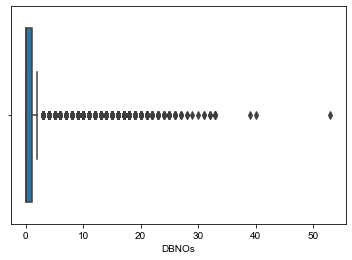

In [16]:
sns.boxplot(x = train_data.DBNOs)
setSize(10, 5)

In [17]:
train_data.DBNOs.max()

53

In [18]:
train_data[(train_data.DBNOs == 53)]

Id         groupId         matchId  assists  boosts  \
2070648  f83f0bfaafb7d8  22d80bf00f56b7  fc0bbecba8db99        2       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2070648       5330.0     53             41     21          1        1000   

         kills  killStreaks  longestKill  matchDuration    matchType  \
2070648     55           14        310.3           1796  arcade-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
2070648        11         11          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2070648           0.0          0                0         12.19   

         weaponsAcquired  winPoints  winPlacePerc  
2070648               17       1500           1.0

In [19]:
((train_data[(train_data.DBNOs <= 1)].shape[0]) * 100)/(train_data.shape[0])

84.44131068026674

### About 84% of players have DBNOs less than or equal to 1.

In [20]:
temp_data[(temp_data.DBNOs == 53)]

Id         groupId         matchId  assists  boosts  \
2070648  f83f0bfaafb7d8  22d80bf00f56b7  fc0bbecba8db99        2       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2070648       5330.0     53             41     21          1        1000   

         kills  killStreaks  longestKill  matchDuration         matchType  \
2070648     55           14        310.3           1796  normal-squad-fpp   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
2070648        11         11          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
2070648           0.0          0                0         12.19   

         weaponsAcquired  winPoints  winPlacePerc  
2070648               17       1500           1.0

In [21]:
train_data[(train_data.DBNOs <= 1) & (train_data.winPlacePerc > 0.5)]

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
2        abad453008c6f9  30338d07f9de75  2ae027da487bb2        1       0   
3        fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
7        2b31c6692badb6  5703ce64c5b4b5  36132eb4669938        0       0   
12       71639bdda5fad2  1ce6ccad526292  4063ea02436e63        0       2   
...                 ...             ...             ...      ...     ...   
3112325  9294d56a7df948  eacfe19dec5595  a72b0fa2ab5b29        1       0   
3112326  99a6815ca1309e  739e438f152a92  340331f9eaceab        0       4   
3112328  c236ec80f84f1f  b356972b7561df  be29acc624a151        0       0   
3112334  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112337  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0              23.54      0              0      1         47        1245   
2              51.60      0              0      0         62        1254   
3             165.20      0              0      1         50           0   
7             235.50      0              0      3         36        1260   
12            101.00      1              0      3         53           0   
...              ...    ...            ...    ...        ...         ...   
3112325        72.24      0              0      0         39        1099   
3112326         0.00      0              0      0         44           0   
3112328         0.00      0              0      0         53           0   
3112334        43.00      0              0      1         49           0   
3112337       192.50      0              0      1         53        1245   

         kills  killStreaks  longestKill  matchDuration      matchType  \
0            0            0         0.00           1298  standard-mode   
2            0            0         0.00           1324  standard-mode   
3            0            0         0.00           1390  standard-mode   
7            1            1        14.18           1485  standard-mode   
12           0            0         0.00           1910  standard-mode   
...        ...          ...          ...            ...            ...   
3112325      0            0         0.00           1839  standard-mode   
3112326      0            0         0.00           1758  standard-mode   
3112328      0            0         0.00           1292  standard-mode   
3112334      0            0         0.00           1423  standard-mode   
3112337      0            0         0.00           1371  standard-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0              29         28           0        0           0.0          0   
2              28         28          -1        0           0.0          0   
3              28         28        1473        0           0.0          0   
7              95         92          -1        0           0.0          0   
12             49         45        1474        0        2775.0          0   
...           ...        ...         ...      ...           ...        ...   
3112325        46         45          -1        0           0.0          0   
3112326        30         28        1399        1        5453.0          0   
3112328        50         50        1553        0           0.0          0   
3112334        49         48        1528        0           0.0          0   
3112337        49         49          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0.00          0                0        2600.0   
2                0.00          0                0        1589.0   
3               48.32          0                0        3180.0   
7                0.00          0                0         173.0   
12               0.00          0  

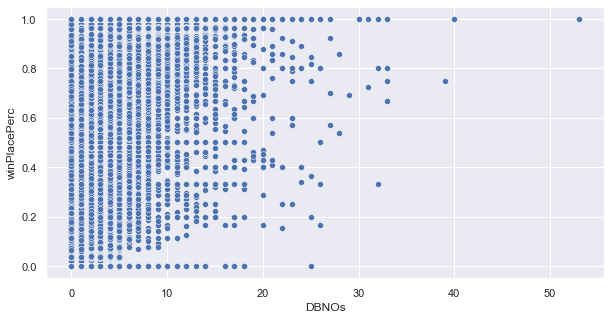

In [22]:
sns.scatterplot(x=train_data.DBNOs, y=train_data.winPlacePerc)
setSize(20, 10)

## Standard Data

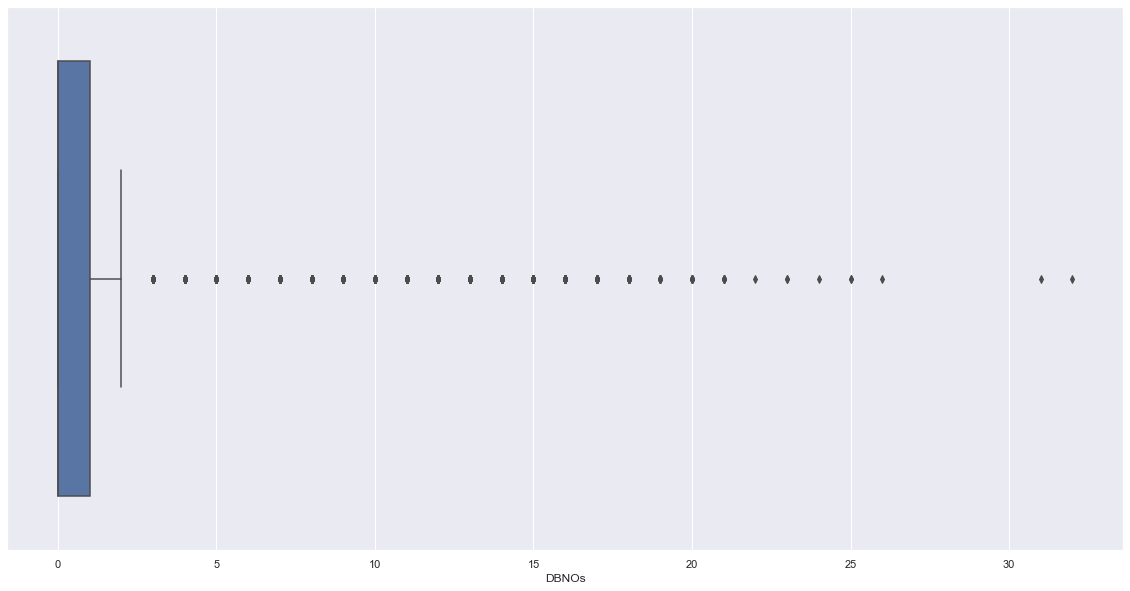

In [23]:
sns.boxplot(x = standard_data.DBNOs)
setSize(10, 5)

In [24]:
((standard_data[(standard_data.DBNOs <= 1)].shape[0]) * 100)/(standard_data.shape[0])

84.47359659656937

In [25]:
standard_data.DBNOs.max()

32

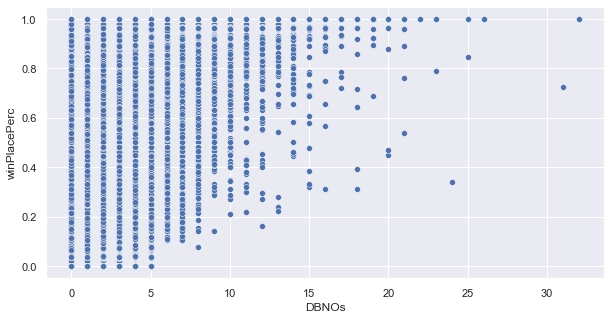

In [26]:
sns.scatterplot(x=standard_data.DBNOs, y=standard_data.winPlacePerc)
setSize(20, 10)

## Arcade Data

In [27]:
((arcade_data[(arcade_data.DBNOs <= 1)].shape[0]) * 100)/(arcade_data.shape[0])

77.57504082896885

In [28]:
arcade_data.DBNOs.max()

53

In [29]:
arcade_data.describe()

assists        boosts   damageDealt         DBNOs  headshotKills  \
count  17757.000000  17757.000000  17757.000000  17757.000000   17757.000000   
mean       1.124965      1.424114    392.873790      1.343864       0.806949   
std        1.808681      1.912406    516.819624      3.104803       1.882805   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000     58.880000      0.000000       0.000000   
50%        0.000000      1.000000    203.800000      0.000000       0.000000   
75%        2.000000      2.000000    541.100000      1.000000       1.000000   
max       22.000000     14.000000   6616.000000     53.000000      64.000000   

              heals     killPlace    killPoints         kills   killStreaks  \
count  17757.000000  17757.000000  17757.000000  17757.000000  17757.000000   
mean       2.789266     26.331081    485.780256      3.267894      0.942670   
std        3.919839     18.778613    499.811832      5.267504      1.013194   
min        0.000000      1.000000      0.000000      0.000000      0.000000   
25%        0.000000     10.000000      0.000000      0.000000      0.000000   
50%        1.000000     23.000000      0.000000      1.000000      1.000000   
75%        4.000000     40.000000   1000.000000      4.000000      1.000000   
max       37.000000    100.000000   1000.000000     72.000000     20.000000   

        longestKill  matchDuration      maxPlace     numGroups    rankPoints  \
count  17757.000000   17757.000000  17757.000000  17757.000000  17757.000000   
mean      55.062821    1514.818888     16.276116     15.658782    770.857183   
std       85.877219     575.701344      9.084685      8.744804    750.203836   
min        0.000000     133.000000      2.000000      1.000000     -1.000000   
25%        0.000000     899.000000     10.000000      9.000000     -1.000000   
50%       20.510000    1847.000000     16.000000     15.000000   1500.000000   
75%       80.120000    2009.000000     18.000000     16.000000   1500.000000   
max     1075.000000    2185.000000     54.000000     51.000000   1500.000000   

            revives  rideDistance     roadKills  swimDistance     teamKills  \
count  17757.000000  17757.000000  17757.000000  17757.000000  17757.000000   
mean       0.251619   1911.754401      0.005125      4.687403      0.047587   
std        0.678731   2521.583572      0.087045     39.259302      0.293428   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000    381.100000      0.000000      0.000000      0.000000   
75%        0.000000   3411.000000      0.000000      0.000000      0.000000   
max       15.000000  14270.000000      4.000000   1669.000000     10.000000   

       vehicleDestroys  walkDistance  weaponsAcquired     winPoints  \
count     17757.000000  17757.000000     17757.000000  17757.000000   
mean          0.027313   1356.361759         9.285127    728.670384   
std           0.180696   1140.811123         9.187153    749.717748   
min           0.000000      0.000000         0.000000      0.000000   
25%           0.000000    347.100000         4.000000      0.000000   
50%           0.000000   1205.000000         6.000000      0.000000   
75%           0.000000   2055.000000        12.000000   1500.000000   
max           4.000000   8895.000000        96.000000   1500.000000   

       winPlacePerc  
count  17757.000000  
mean       0.509003  
std        0.322423  
min        0.000000  
25%        0.222200  
50%        0.500000  
75%        0.800000  
max        1.000000

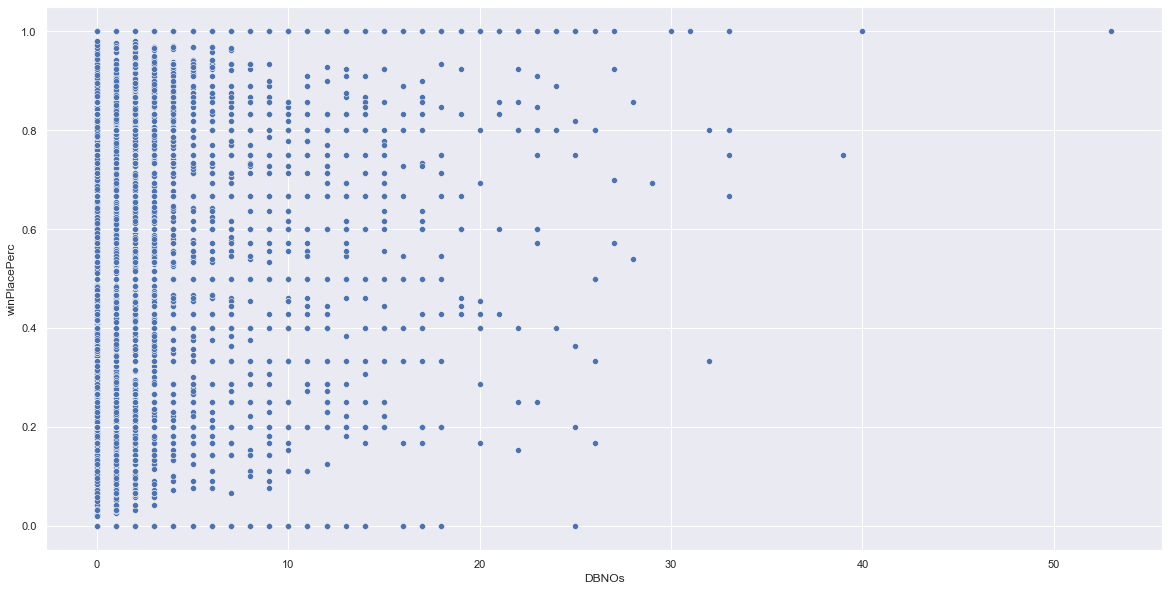

In [30]:
sns.scatterplot(x=arcade_data.DBNOs, y=arcade_data.winPlacePerc)
setSize(20, 10)

In [31]:
arcade_data[arcade_data.DBNOs <= 4].winPlacePerc.mean()

0.4982525499570953

## Other Data

In [32]:
((other_data[(other_data.DBNOs <= 1)].shape[0]) * 100)/(other_data.shape[0])

87.67641495707842

In [33]:
other_data.DBNOs.max()

21

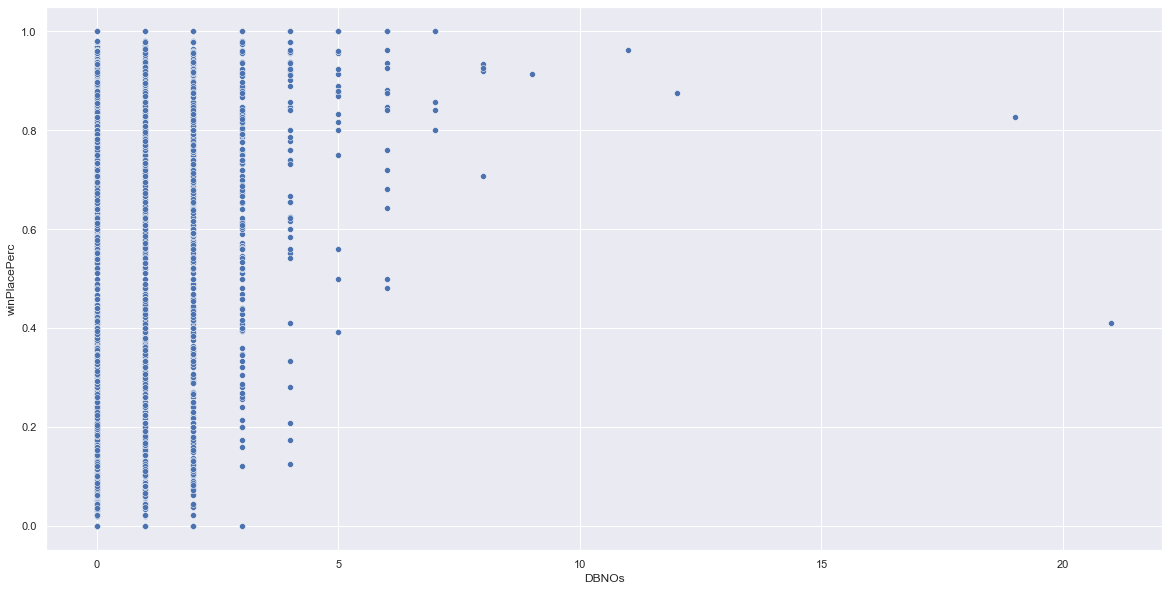

In [34]:
sns.scatterplot(x=other_data.DBNOs, y=other_data.winPlacePerc)
setSize(20, 10)

In [35]:
other_data[(other_data.DBNOs >= 5)].shape

(58, 29)

# Boosts and Heals

In [36]:
train_data.boosts.describe()

count    3.112338e+06
mean     1.107898e+00
std      1.716341e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.300000e+01
Name: boosts, dtype: float64

In [37]:
train_data.heals.describe()

count    3.112338e+06
mean     1.370968e+00
std      2.679355e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      8.000000e+01
Name: heals, dtype: float64

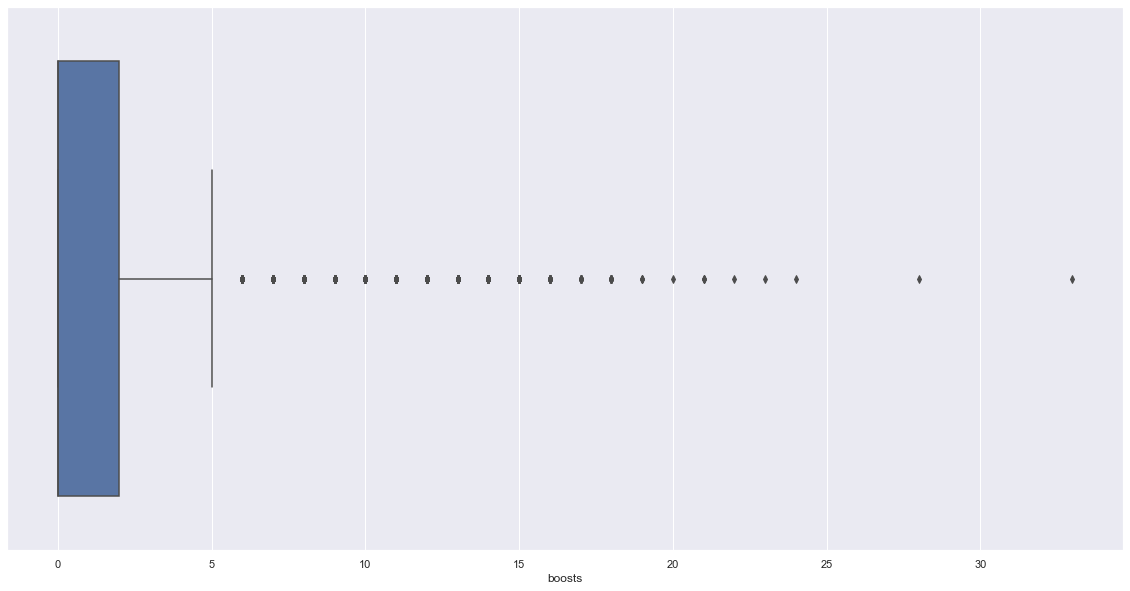

In [38]:
sns.boxplot(x = train_data.boosts)
setSize(10, 5)

(-1.0, 10.0)

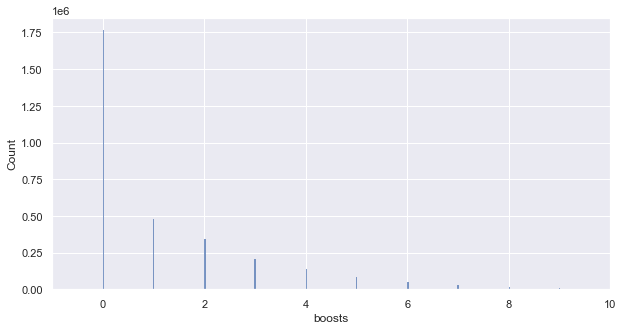

In [39]:
sns.histplot(x = train_data.boosts)
plt.xlim(-1,10)

(-1.0, 10.0)

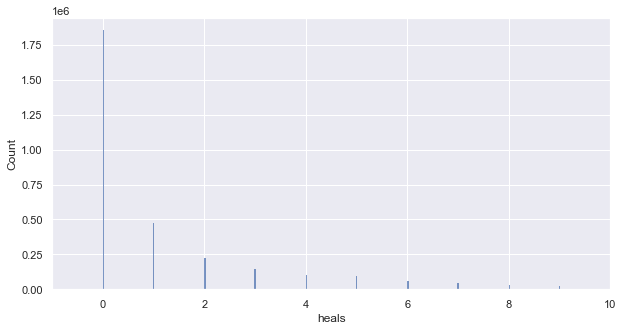

In [40]:
sns.histplot(x = train_data.heals)
plt.xlim(-1,10)

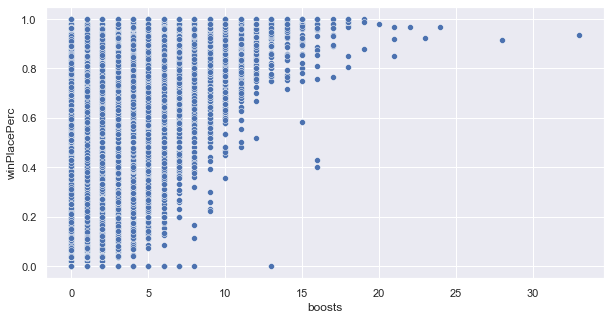

In [41]:
sns.scatterplot(x=train_data.boosts, y=train_data.winPlacePerc)
setSize(20, 10)

In [42]:
train_data[(train_data.boosts >= 8)].winPlacePerc.mean()

0.9341706123123688

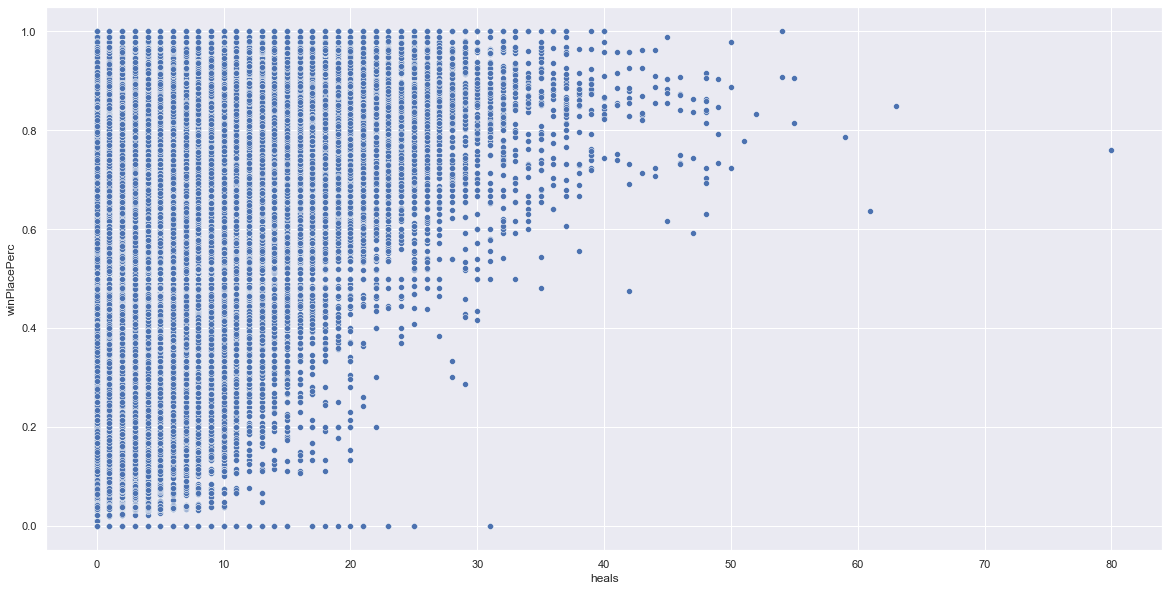

In [43]:
sns.scatterplot(x=train_data.heals, y=train_data.winPlacePerc)
setSize(20, 10)

### Since the data distribution of boosts and heals is similar and they belong to same category of items which is 'healing' items we can add it up and see how it performs.

In [44]:
def addHB(df) :
    hb = df['heals'] + df['boosts']
    df.insert(0, 'heal_boost', hb)

In [45]:
#addHB(train_data)

<AxesSubplot:>

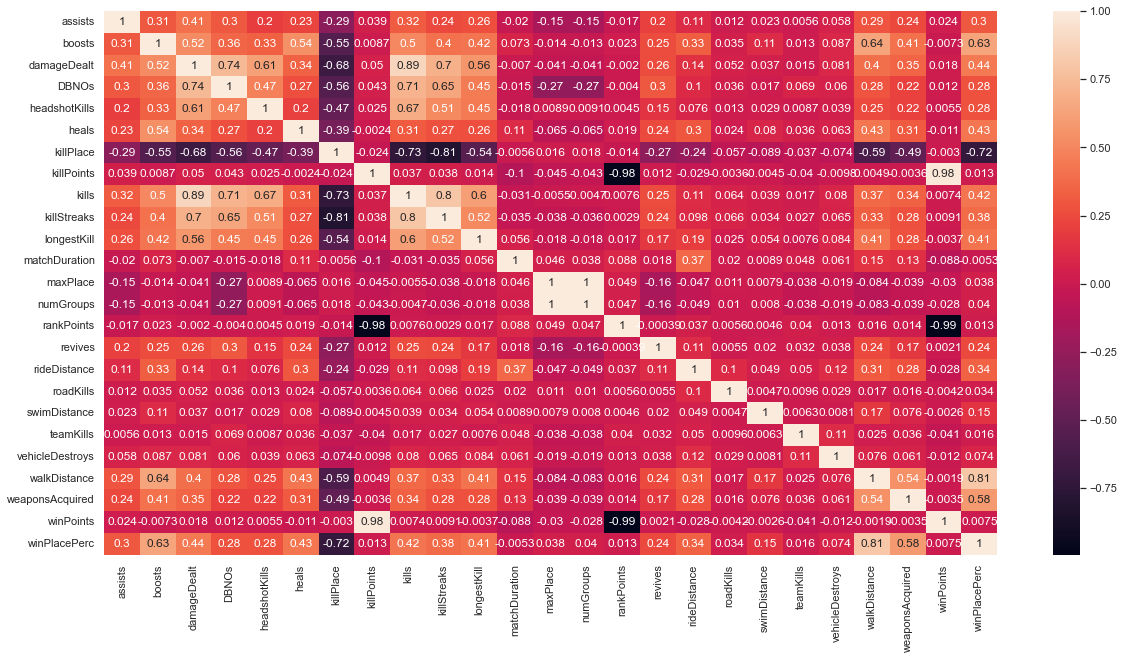

In [46]:
sns.heatmap(train_data.corr(),annot = True)

### In original data, we can see that boosts is corelated well with winPlacePerc

## Standard Data

In [47]:
standard_data.boosts.describe()

count    3.087708e+06
mean     1.105876e+00
std      1.715130e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.300000e+01
Name: boosts, dtype: float64

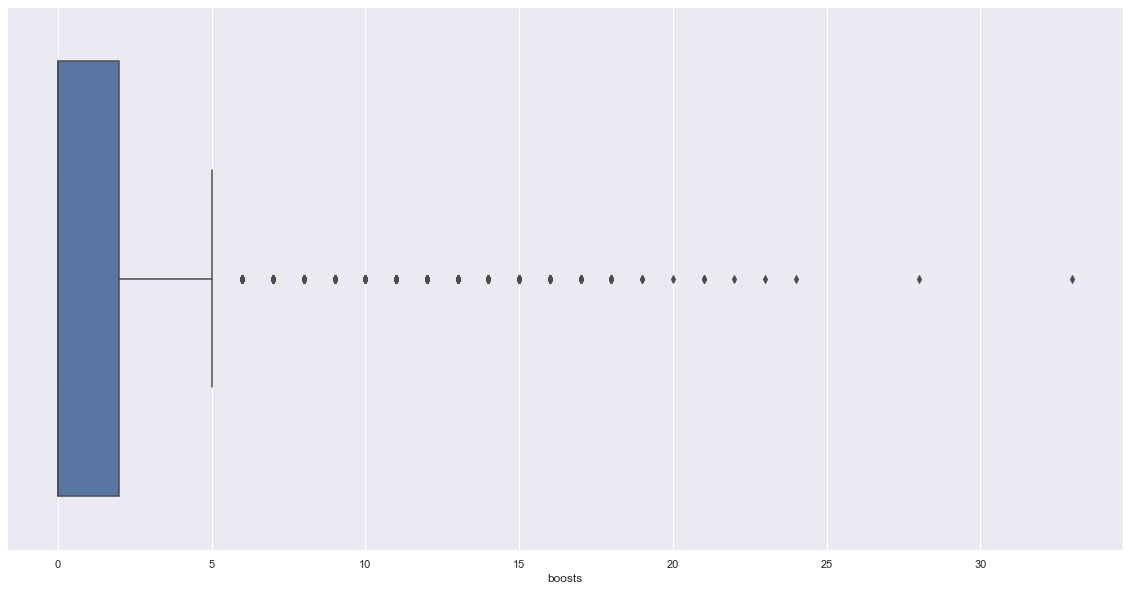

In [48]:
sns.boxplot(x = standard_data.boosts)
setSize(10, 5)

(-1.0, 10.0)

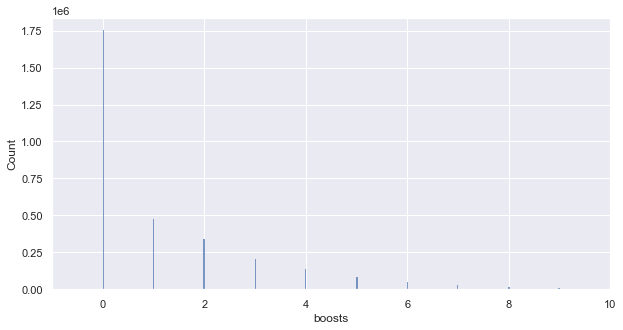

In [49]:
sns.histplot(x = standard_data.boosts)
plt.xlim(-1,10)

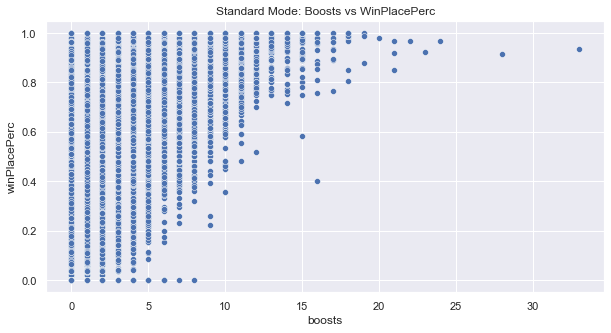

In [50]:
sns.scatterplot(x=standard_data.boosts, y=standard_data.winPlacePerc)
plt.title("Standard Mode: Boosts vs WinPlacePerc")
setSize(20, 10)

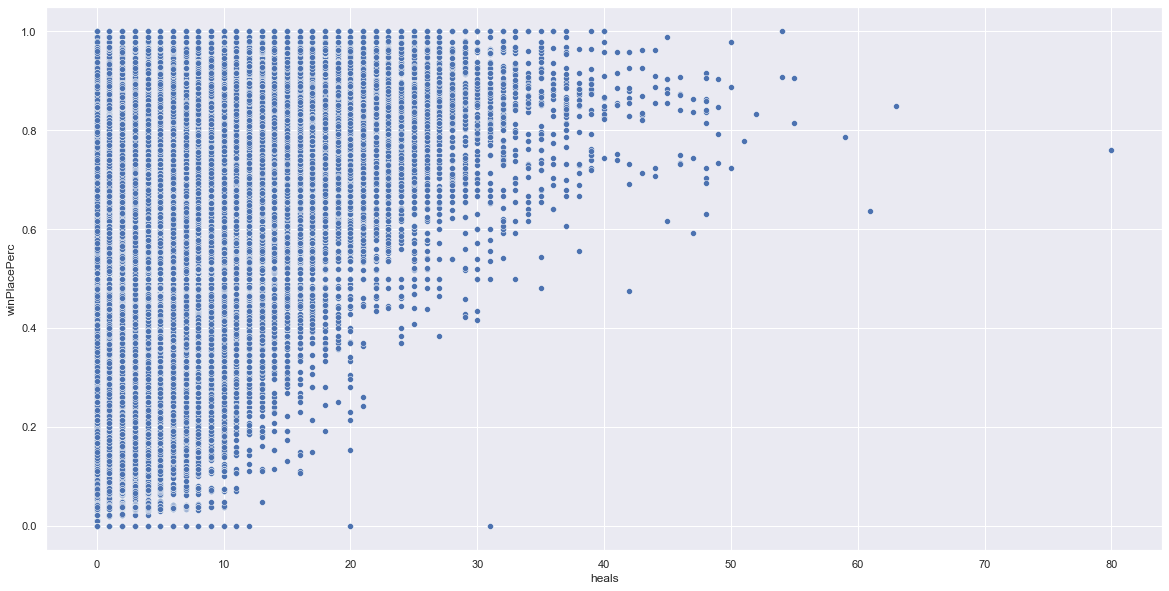

In [51]:
sns.scatterplot(x=standard_data.heals, y=standard_data.winPlacePerc)
setSize(20, 10)

In [52]:
addHB(standard_data)

<AxesSubplot:>

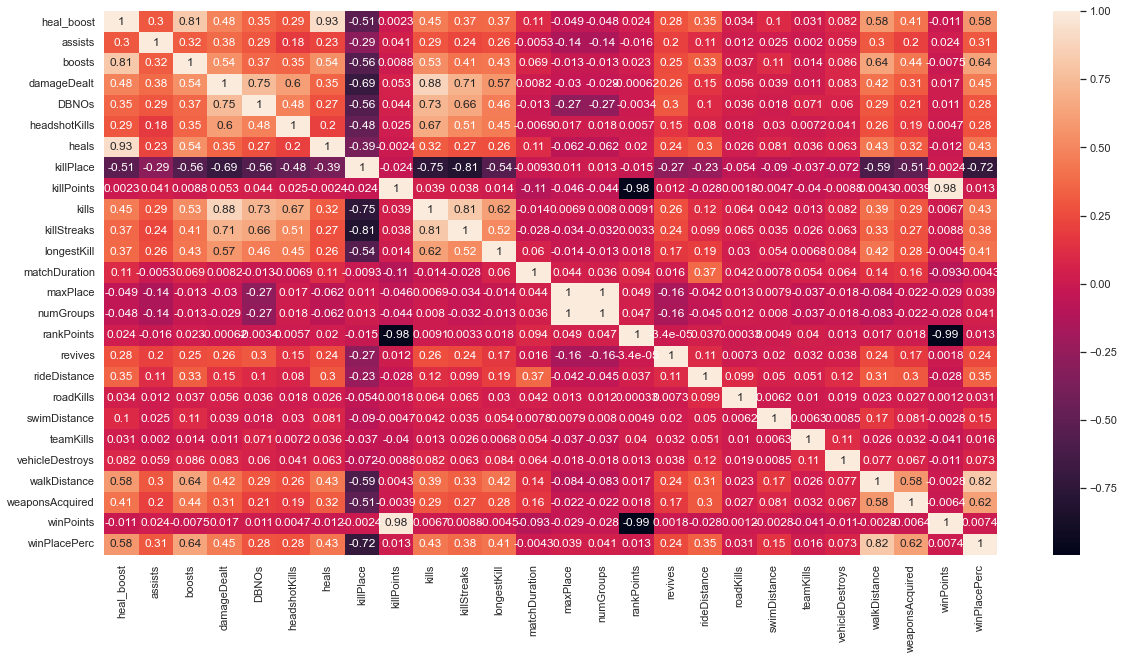

In [53]:
sns.heatmap(standard_data.corr(),annot = True)

### In standard data, we can see that boosts is corelated well with winPlacePerc and okish with heals

## Arcade Data

In [54]:
arcade_data.boosts.describe()

count    17757.000000
mean         1.424114
std          1.912406
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         14.000000
Name: boosts, dtype: float64

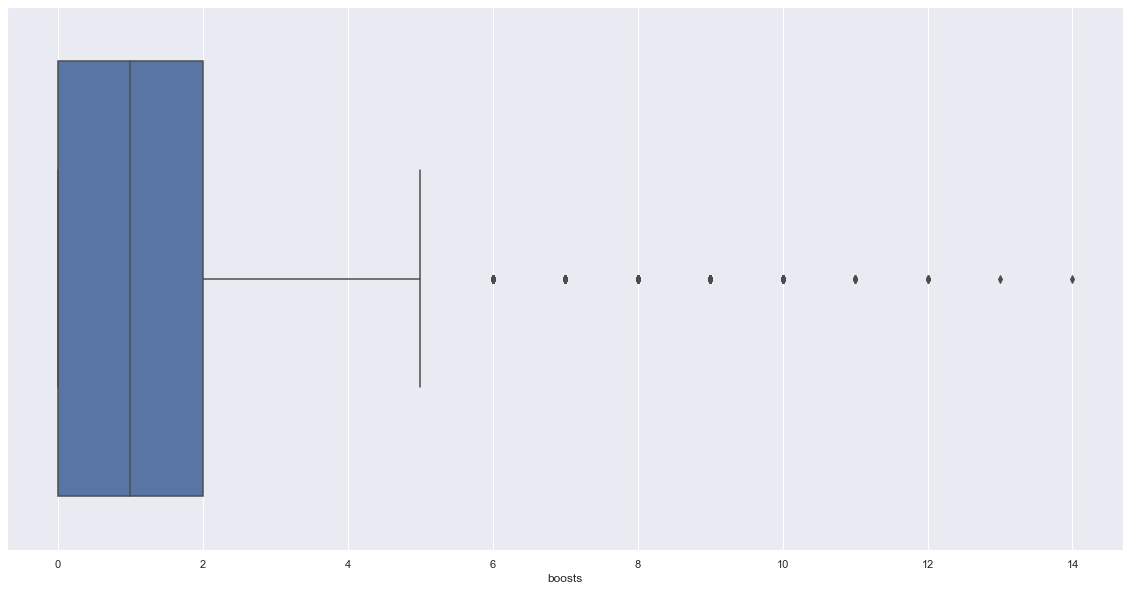

In [55]:
sns.boxplot(x = arcade_data.boosts)
setSize(10, 5)

(-1.0, 10.0)

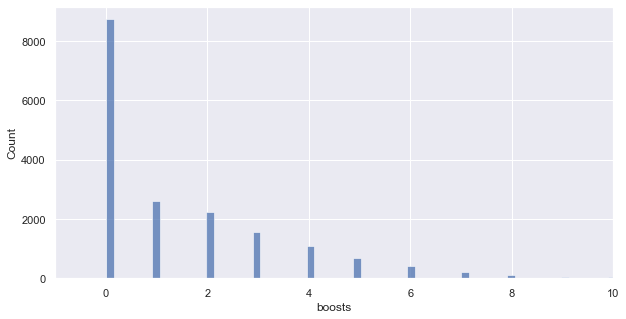

In [56]:
sns.histplot(x = arcade_data.boosts)
plt.xlim(-1,10)

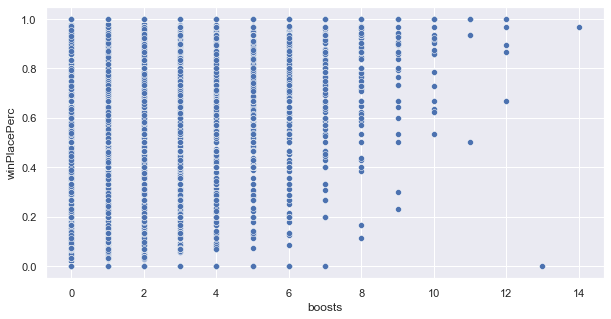

In [57]:
sns.scatterplot(x=arcade_data.boosts, y=arcade_data.winPlacePerc)
setSize(20, 10)

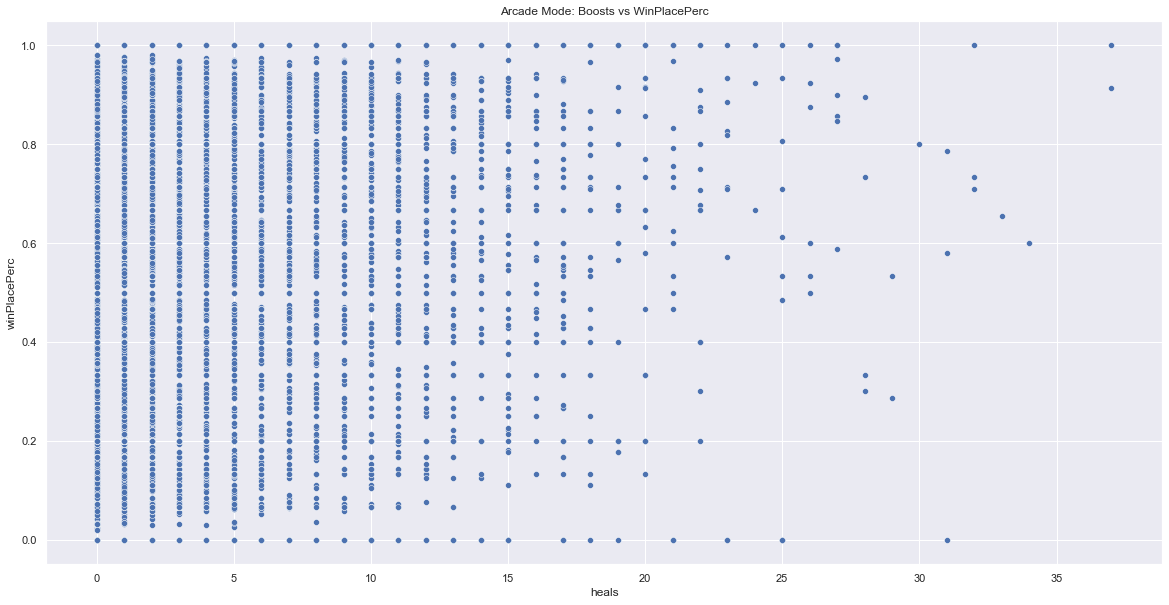

In [58]:
sns.scatterplot(x=arcade_data.heals, y=arcade_data.winPlacePerc)
plt.title("Arcade Mode: Boosts vs WinPlacePerc")
setSize(20, 10)

In [59]:
addHB(arcade_data)

<AxesSubplot:>

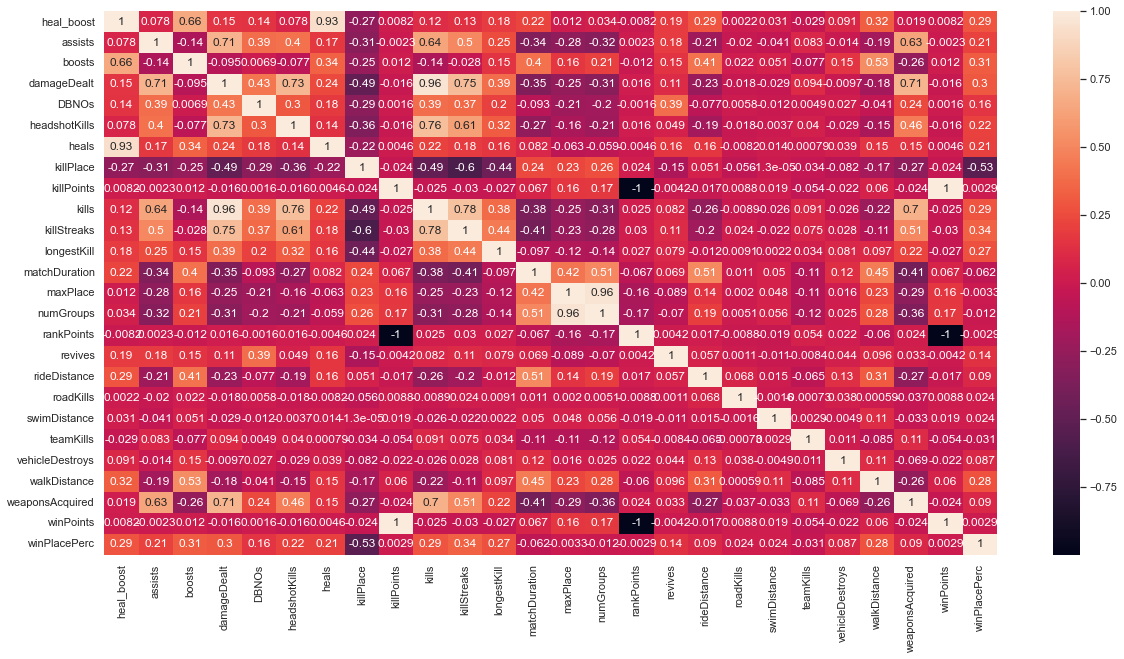

In [60]:
sns.heatmap(arcade_data.corr(),annot = True)

### In arcade data, we can see that boosts is not that corelated with winPlacePerc

## Other Data

In [61]:
other_data.boosts.describe()

count    6873.000000
mean        1.199185
std         1.645642
min         0.000000
25%         0.000000
50%         0.000000
75%         2.000000
max        16.000000
Name: boosts, dtype: float64

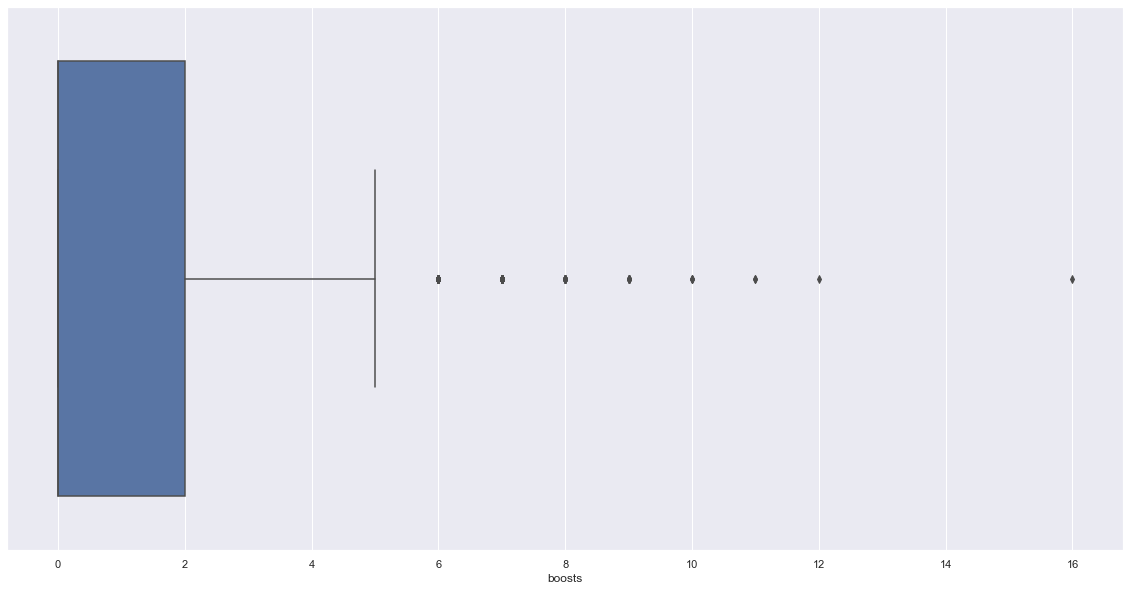

In [62]:
sns.boxplot(x = other_data.boosts)
setSize(10, 5)

In [63]:
other_data[other_data.boosts > 5]

Id         groupId         matchId  assists  boosts  \
13    184f30b0183ec7  254876c6a0ede9  be945f2803814a        0       6   
73    9737f24df54a9f  915ab606fc2e2f  9e6d4e4aad23aa        0       6   
76    519ec7c67c657e  454bc8111c4619  4f4588dfa9beb7        3       6   
146   49ac8f4deb7fea  f6475ac329e942  5063ff322776bb        1       6   
172   07896e1e693869  07d923f63b1074  8fcb66d54bb1a2        3       8   
...              ...             ...             ...      ...     ...   
6592  a758b365259e7a  37291b4e12f33e  22b5242aa9a20b        0       7   
6649  2bb5790612984e  caecf29bed6867  13f2b730d08d6d        2       9   
6698  50be0db98c56c9  31084ba0a4232c  409ace5db1b6a1        3       6   
6804  4097c8558f3907  15765ba2b2c5c4  678649e2a34e50        0       6   
6824  95cc2a848d15b4  6f5fab6c4a09a1  409ace5db1b6a1        6       6   

      damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  kills  \
13         295.60      1              0      1          9           0      3   
73           0.00      0              0      4         43           0      0   
76         416.30      1              0     17         24           0      1   
146        208.00      1              0      4         13           0      2   
172        275.90      1              0      4         17           0      1   
...           ...    ...            ...    ...        ...         ...    ...   
6592        67.91      0              0      0         11           0      2   
6649       373.90      2              0     15          7           0      3   
6698        18.76      0              0      0         32           0      0   
6804       221.60      0              0      1          6           0      2   
6824       552.30      2              1      1          5           0      3   

      killStreaks  longestKill  matchDuration matchType  maxPlace  numGroups  \
13              2        51.96            915     other        50         50   
73              0         0.00            835     other        49         45   
76              1        18.48           1746     other        28         27   
146             1        75.64           1792     other        27         27   
172             1        82.11           1932     other        26         26   
...           ...          ...            ...       ...       ...        ...   
6592            1        53.72            894     other        46         44   
6649            1       271.00           1878     other        25         25   
6698            0         0.00           1811     other        24         23   
6804            1        10.51            909     other        51         45   
6824            1       387.60           1811     other        24         23   

      rankPoints  revives  rideDistance  roadKills  swimDistance  teamKills  \
13          1500        0        4522.0          0          0.00          0   
73          1500        0        1440.0          0          0.00          0   
76          1500        2        1108.0          0         34.83          0   
146         1500        0        3194.0          1          0.00          0   
172         1500        1        5047.0          0          0.00          0   
...          ...      ...           ...        ...           ...        ...   
6592        1500        0        1752.0          0          0.00          0   
6649        1500        0        6555.0          0          0.00          0   
6698        1500        0         632.6          0          0.00          0   
6804        1500        0        4523.0          1          0.00          0   
6824        1500        1        3513.0          0          0.00          0   

      vehicleDestroys  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
13                  2         371.7                1          0        0.8980  
73                  0        2048.0                4          0        0.7292  
76                  0        3

(-1.0, 10.0)

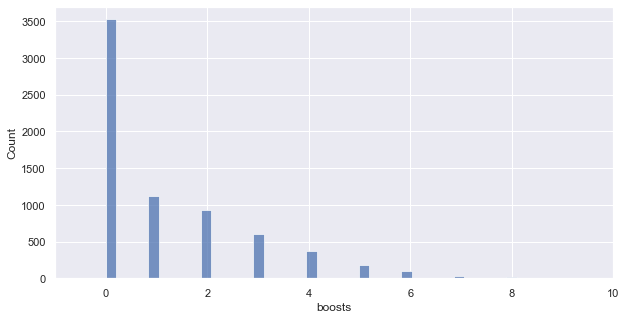

In [64]:
sns.histplot(x = other_data.boosts)
plt.xlim(-1,10)

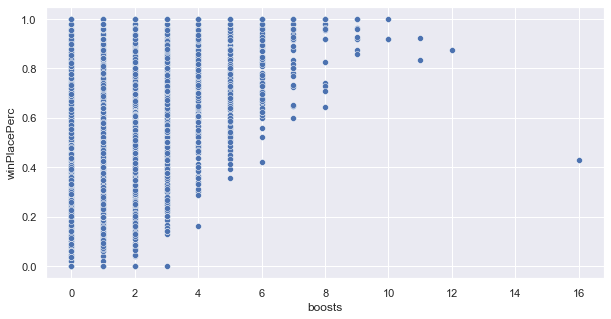

In [65]:
sns.scatterplot(x=other_data.boosts, y=other_data.winPlacePerc)
setSize(20, 10)

## Should we remove this player with no of boosts = 16 but winPlacePerc < 0.5 ?

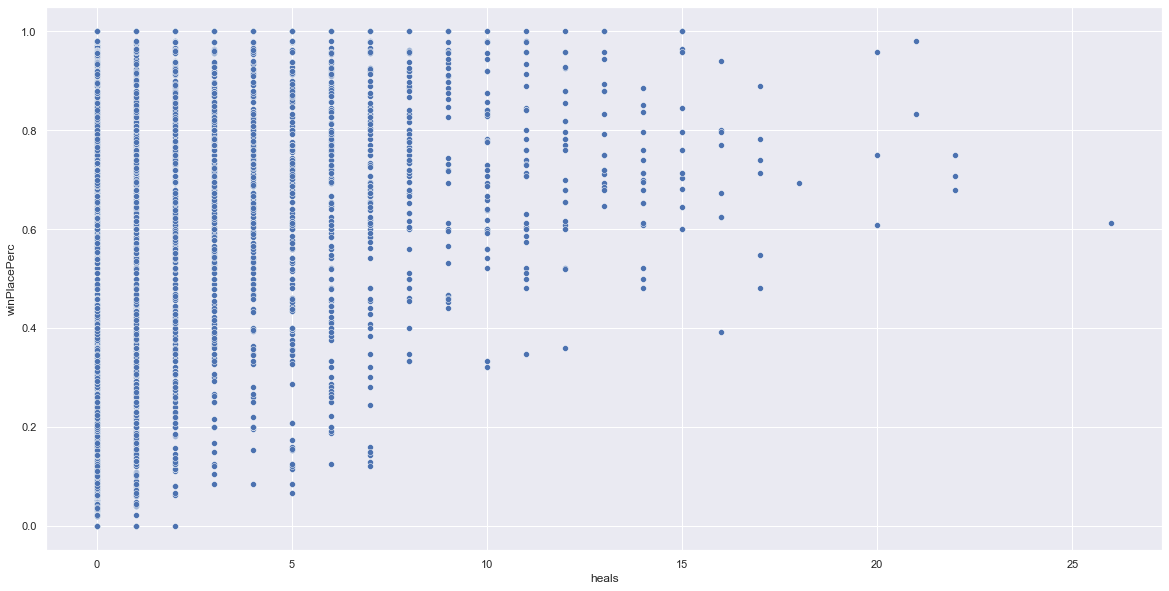

In [66]:
sns.scatterplot(x=other_data.heals, y=other_data.winPlacePerc)
setSize(20, 10)

In [67]:
addHB(other_data)

<AxesSubplot:>

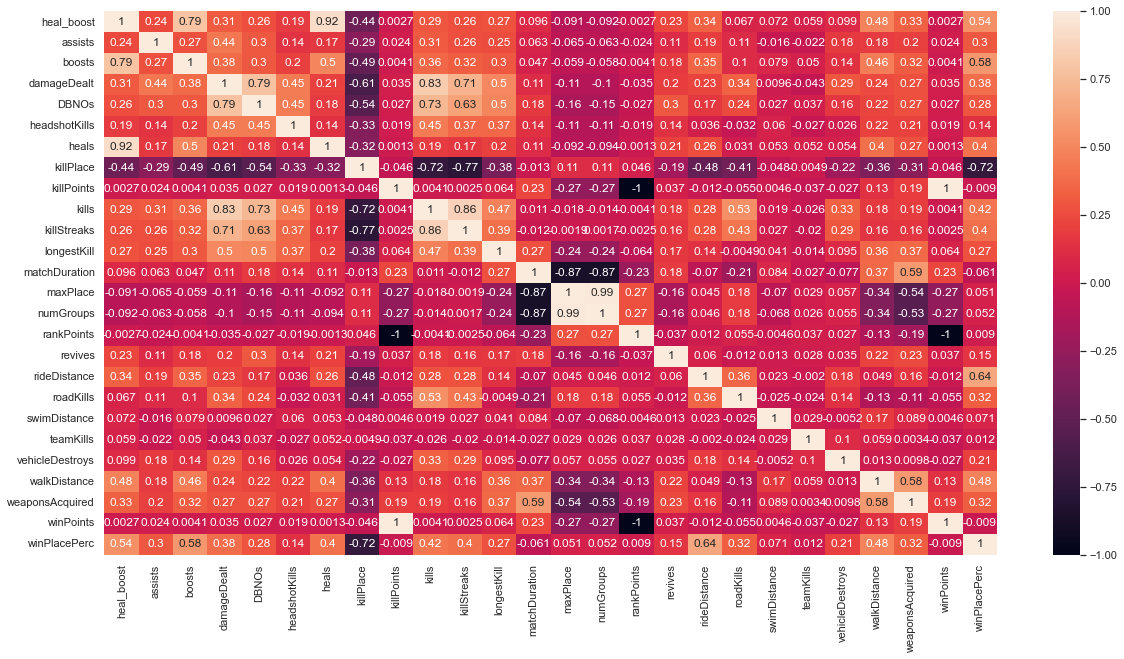

In [68]:
sns.heatmap(other_data.corr(),annot = True)

### In other data, we can see that boosts is corelated okish with winPlacePerc

### Merging heals and boosts isnt  making the corelation with winPlacePerc any better

# Distance

## Train Data

### Walk Distance

In [69]:
train_data.walkDistance.describe()

count    3.112338e+06
mean     1.155095e+03
std      1.183501e+03
min      0.000000e+00
25%      1.555000e+02
50%      6.870000e+02
75%      1.978000e+03
max      2.578000e+04
Name: walkDistance, dtype: float64

In [70]:
train_data[(train_data.walkDistance >= 1978) & (train_data.winPlacePerc > 0.5)]

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
3        fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
9        970e5381982d17  1e964977f28735  ed478e94af1c99        1       3   
14       d6cce0ed023afc  b6b6fa3796e930  7b86700d61ccba        2       3   
15       5c6f4f75b6cf80  6255b60b600564  5e01f8af4f0786        1       0   
...                 ...             ...             ...      ...     ...   
3112329  4f67374334632a  d8b18828c9f47b  6790bc202bf49e        1       4   
3112330  4a63e40b57f6b6  4d2529b8ad84d8  3c264f8d7914ad        1       8   
3112334  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112335  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2       0   
3112337  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0              23.54      0              0      1         47        1245   
3             165.20      0              0      1         50           0   
9             275.60      2              0      3          2        1310   
14            234.90      1              1      3         14           0   
15            203.00      2              0      0          9        1431   
...              ...    ...            ...    ...        ...         ...   
3112329       572.20      2              2      7          4           0   
3112330       517.10      3              1     11          6           0   
3112334        43.00      0              0      1         49           0   
3112335       191.80      3              0      1         26           0   
3112337       192.50      0              0      1         53        1245   

         kills  killStreaks  longestKill  matchDuration      matchType  \
0            0            0         0.00           1298  standard-mode   
3            0            0         0.00           1390  standard-mode   
9            4            2       275.20           1364  standard-mode   
14           2            2        18.43           1924  standard-mode   
15           2            1       178.50           1352  standard-mode   
...        ...          ...          ...            ...            ...   
3112329      5            4        38.39           1440  standard-mode   
3112330      3            1        79.24           1836  standard-mode   
3112334      0            0         0.00           1423  standard-mode   
3112335      1            1        58.93           1524  standard-mode   
3112337      0            0         0.00           1371  standard-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0              29         28           0        0           0.0          0   
3              28         28        1473        0           0.0          0   
9              26         23          -1        1           0.0          0   
14             30         29        1489        1        2064.0          0   
15             25         25          -1        0           0.0          0   
...           ...        ...         ...      ...           ...        ...   
3112329        49         49        1495        0           0.0          0   
3112330        47         47        1500        0        1880.0          0   
3112334        49         48        1528        0           0.0          0   
3112335        28         27        1495        0           0.0          0   
3112337        49         49          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0.00          0                0        2600.0   
3               48.32          0                0        3180.0   
9               93.66          0                0        2992.0   
14               0.00          0                0        2126.0   
15               0.00          0  

### We can see the trend that who has walked more than 75percentile i.e about 1978 has a winPlacePerc mean of 0.82 which means they have a higher chance of winning 

In [71]:
train_data[(train_data.walkDistance >= 1978)].winPlacePerc.mean()

0.826048732250033

In [72]:
((train_data[(train_data.walkDistance >= 1978)].shape[0]) * 100)/(train_data.shape[0])

25.012257666101817

In [73]:
train_data[(train_data.walkDistance <= 1978)].winPlacePerc.mean()

0.3552955462010343

In [74]:
((train_data[(train_data.walkDistance <= 1978)].shape[0]) * 100)/(train_data.shape[0])

75.00579949864057

### We can see that 75 % of players who have walked less than 1978 have a lower chance of winning 

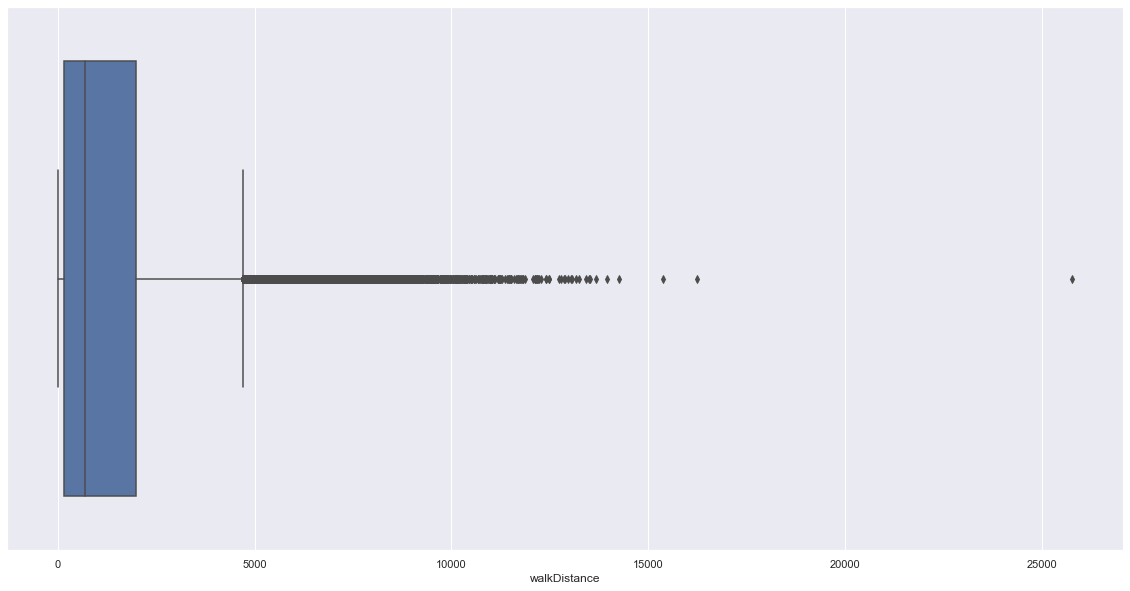

In [75]:
sns.boxplot(x = train_data.walkDistance)
setSize(10, 5)

(-1.0, 5000.0)

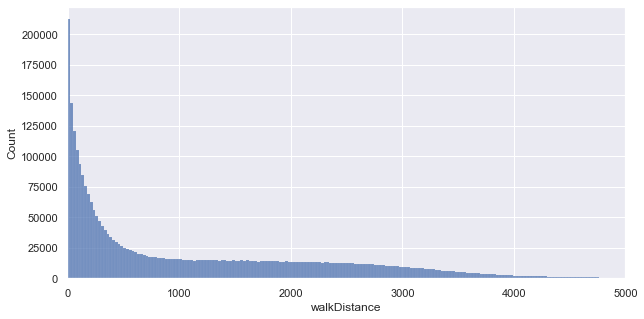

In [76]:
sns.histplot(x = train_data.walkDistance)
plt.xlim(-1,5000)

In [77]:
train_data[(train_data.walkDistance >= 20000)]

Id         groupId         matchId  assists  boosts  \
1100988  3304d0c68e27f5  503757159d22dd  ce88f9c8c35bdf        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
1100988          0.0      0              0      0         46           0   

         kills  killStreaks  longestKill  matchDuration      matchType  \
1100988      0            0          0.0           1889  standard-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
1100988        95         93        1520        0        0.0078          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
1100988         381.9          0                0       25780.0   

         weaponsAcquired  winPoints  winPlacePerc  
1100988                0          0        0.9894

### Only one player has walked more than 20000 meters

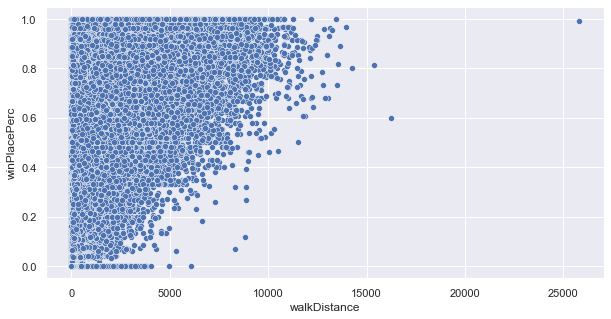

In [78]:
sns.scatterplot(x=train_data.walkDistance, y=train_data.winPlacePerc)
setSize(20, 10)

### We can see that walkDistance feature is linearly increasing(highly correlated) with winPlacePerc

### Swim Distance

In [79]:
train_data.swimDistance.describe()

count    3.112338e+06
mean     4.531851e+00
std      3.061169e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.718000e+03
Name: swimDistance, dtype: float64

In [80]:
train_data[(train_data.swimDistance == 0) & (train_data.winPlacePerc >= 0.7)]

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
10       8b4e022c7fb0c2  13389bd526512b  5ea10a7a34286e        0       2   
14       d6cce0ed023afc  b6b6fa3796e930  7b86700d61ccba        2       3   
15       5c6f4f75b6cf80  6255b60b600564  5e01f8af4f0786        1       0   
21       225a5e8cadd1e3  a192813ebc8ed9  28ebd966f53eae        0       3   
...                 ...             ...             ...      ...     ...   
3112329  4f67374334632a  d8b18828c9f47b  6790bc202bf49e        1       4   
3112330  4a63e40b57f6b6  4d2529b8ad84d8  3c264f8d7914ad        1       8   
3112334  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112335  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2       0   
3112337  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0              23.54      0              0      1         47        1245   
10            260.00      3              0      4         25        1936   
14            234.90      1              1      3         14           0   
15            203.00      2              0      0          9        1431   
21            100.00      1              0      1         21        1000   
...              ...    ...            ...    ...        ...         ...   
3112329       572.20      2              2      7          4           0   
3112330       517.10      3              1     11          6           0   
3112334        43.00      0              0      1         49           0   
3112335       191.80      3              0      1         26           0   
3112337       192.50      0              0      1         53        1245   

         kills  killStreaks  longestKill  matchDuration      matchType  \
0            0            0        0.000           1298  standard-mode   
10           1            1       12.700           1872  standard-mode   
14           2            2       18.430           1924  standard-mode   
15           2            1      178.500           1352  standard-mode   
21           1            1        5.475           1450  standard-mode   
...        ...          ...          ...            ...            ...   
3112329      5            4       38.390           1440  standard-mode   
3112330      3            1       79.240           1836  standard-mode   
3112334      0            0        0.000           1423  standard-mode   
3112335      1            1       58.930           1524  standard-mode   
3112337      0            0        0.000           1371  standard-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0              29         28           0        0           0.0          0   
10             30         29          -1        0           0.0          0   
14             30         29        1489        1        2064.0          0   
15             25         25          -1        0           0.0          0   
21             47         45          -1        0         140.8          0   
...           ...        ...         ...      ...           ...        ...   
3112329        49         49        1495        0           0.0          0   
3112330        47         47        1500        0        1880.0          0   
3112334        49         48        1528        0           0.0          0   
3112335        28         27        1495        0           0.0          0   
3112337        49         49          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                 0.0          0                0        2600.0   
10                0.0          0                0         159.0   
14                0.0          0                0        2126.0   
15                0.0          0                0        3960.0   
21                0.0          0  

In [81]:
((train_data[(train_data.swimDistance <= 0)].shape[0]) * 100)/(train_data.shape[0])

93.48823938788139

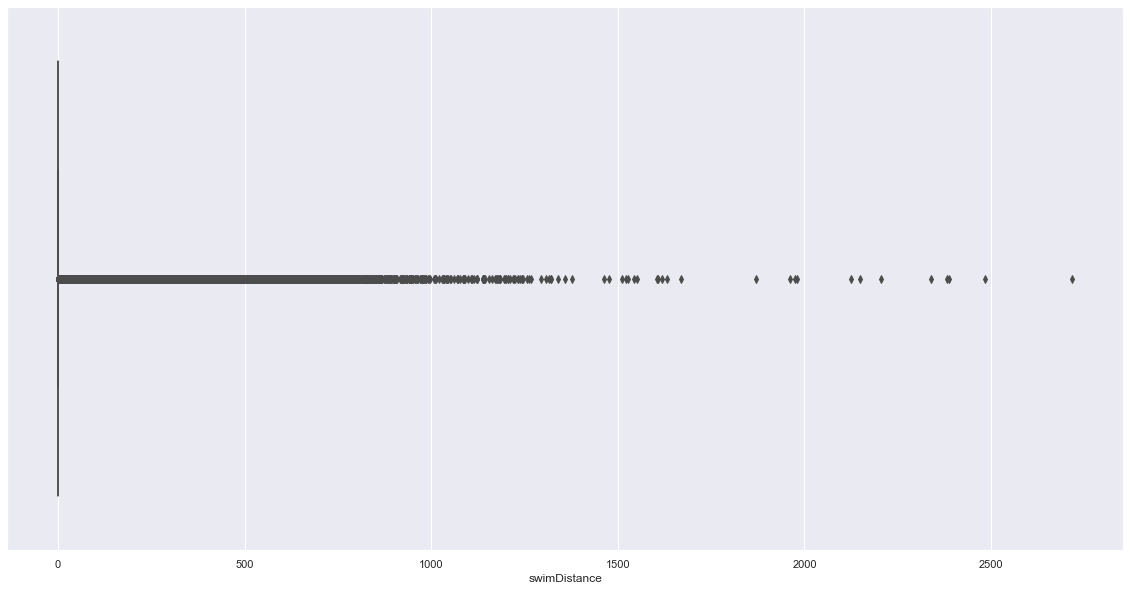

In [82]:
sns.boxplot(x = train_data.swimDistance)
setSize(10, 5)

(-1.0, 500.0)

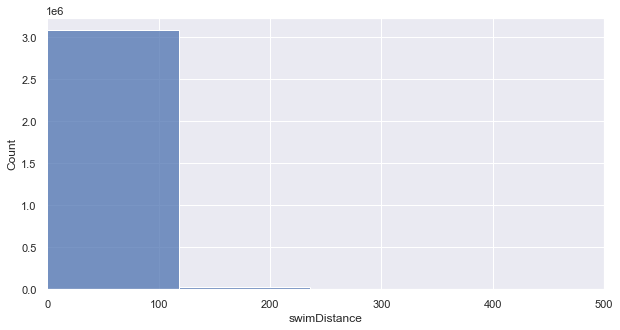

In [83]:
sns.histplot(x = train_data.swimDistance)
plt.xlim(-1,500)

In [84]:
(train_data[train_data.swimDistance <= 200].shape[0] * 100) / (train_data.shape[0])

99.52659383396019

### 99.5% of the players have swum less than 200 meters and their winPlacePerc mean is less than 0.5, this implies that we cant say much about a player winning based on the distance he has swum.

In [85]:
train_data[train_data.swimDistance < 200].winPlacePerc.mean()

0.4714594389186284

In [86]:
(train_data[train_data.swimDistance > 200].shape[0] * 100) / (train_data.shape[0])

0.47340616603980673

In [87]:
train_data[train_data.swimDistance > 200].winPlacePerc.mean()

0.7911578525858458

### Only 0.47 % of players have swum more than 200 meters and their winPlacePerc is about .79 which is on the higher side.

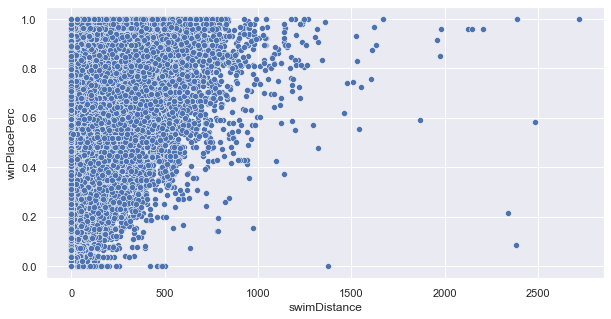

In [88]:
sns.scatterplot(x=train_data.swimDistance, y=train_data.winPlacePerc)
setSize(20, 10)

### WinPlacePerc is linearly increasing with swimDistance 

### Ride Distance

In [89]:
train_data.rideDistance.describe()

count    3.112338e+06
mean     6.070380e+02
std      1.500568e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.217750e-01
max      4.071000e+04
Name: rideDistance, dtype: float64

In [90]:
train_data[(train_data.rideDistance <= .42) & (train_data.winPlacePerc > 0.7)]

Id         groupId         matchId  assists  boosts  \
0        2a718802964d4d  c1827980642b62  9a78c7efc2795b        0       1   
3        fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2       2   
9        970e5381982d17  1e964977f28735  ed478e94af1c99        1       3   
10       8b4e022c7fb0c2  13389bd526512b  5ea10a7a34286e        0       2   
15       5c6f4f75b6cf80  6255b60b600564  5e01f8af4f0786        1       0   
...                 ...             ...             ...      ...     ...   
3112328  c236ec80f84f1f  b356972b7561df  be29acc624a151        0       0   
3112329  4f67374334632a  d8b18828c9f47b  6790bc202bf49e        1       4   
3112334  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0       1   
3112335  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2       0   
3112337  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0       1   

         damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0              23.54      0              0      1         47        1245   
3             165.20      0              0      1         50           0   
9             275.60      2              0      3          2        1310   
10            260.00      3              0      4         25        1936   
15            203.00      2              0      0          9        1431   
...              ...    ...            ...    ...        ...         ...   
3112328         0.00      0              0      0         53           0   
3112329       572.20      2              2      7          4           0   
3112334        43.00      0              0      1         49           0   
3112335       191.80      3              0      1         26           0   
3112337       192.50      0              0      1         53        1245   

         kills  killStreaks  longestKill  matchDuration      matchType  \
0            0            0         0.00           1298  standard-mode   
3            0            0         0.00           1390  standard-mode   
9            4            2       275.20           1364  standard-mode   
10           1            1        12.70           1872  standard-mode   
15           2            1       178.50           1352  standard-mode   
...        ...          ...          ...            ...            ...   
3112328      0            0         0.00           1292  standard-mode   
3112329      5            4        38.39           1440  standard-mode   
3112334      0            0         0.00           1423  standard-mode   
3112335      1            1        58.93           1524  standard-mode   
3112337      0            0         0.00           1371  standard-mode   

         maxPlace  numGroups  rankPoints  revives  rideDistance  roadKills  \
0              29         28           0        0           0.0          0   
3              28         28        1473        0           0.0          0   
9              26         23          -1        1           0.0          0   
10             30         29          -1        0           0.0          0   
15             25         25          -1        0           0.0          0   
...           ...        ...         ...      ...           ...        ...   
3112328        50         50        1553        0           0.0          0   
3112329        49         49        1495        0           0.0          0   
3112334        49         48        1528        0           0.0          0   
3112335        28         27        1495        0           0.0          0   
3112337        49         49          -1        0           0.0          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
0                0.00          0                0        2600.0   
3               48.32          0                0        3180.0   
9               93.66          0                0        2992.0   
10               0.00          0                0         159.0   
15               0.00          0  

In [91]:
((train_data[(train_data.rideDistance < .42)].shape[0]) * 100)/(train_data.shape[0])

74.99914855006108

In [92]:
train_data[(train_data.rideDistance < .42)].winPlacePerc.mean()

0.39804602054564775

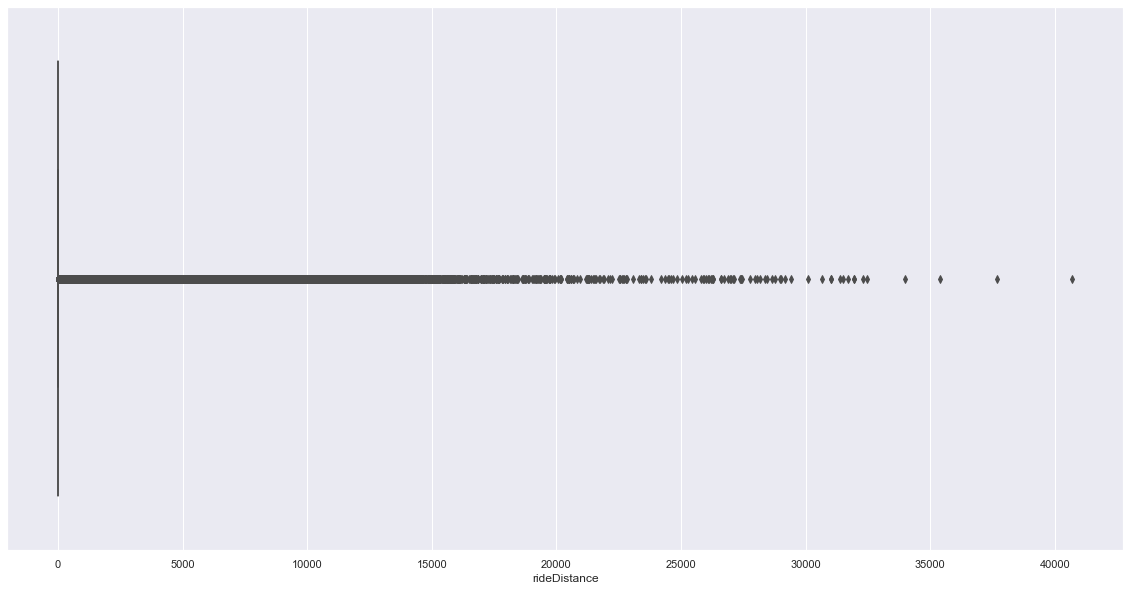

In [93]:
sns.boxplot(x = train_data.rideDistance)
setSize(10, 5)

In [94]:
# sns.scatterplot(x=train_data.rideDistance, y=train_data.winPlacePerc)
# setSize(20, 10)

### Total Distance

## Standard Data

### Walk Distance

In [95]:
standard_data.walkDistance.describe()

count    3.087708e+06
mean     1.154444e+03
std      1.184037e+03
min      0.000000e+00
25%      1.548000e+02
50%      6.839000e+02
75%      1.979000e+03
max      2.578000e+04
Name: walkDistance, dtype: float64

In [96]:
standard_data[(standard_data.walkDistance >= 1978) & (standard_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
0                 2  2a718802964d4d  c1827980642b62  9a78c7efc2795b        0   
3                 3  fba3f5b8dfccc4  206f8c8edfb9a2  a7ea160d40e9f1        2   
8                 6  970e5381982d17  1e964977f28735  ed478e94af1c99        1   
13                6  d6cce0ed023afc  b6b6fa3796e930  7b86700d61ccba        2   
14                0  5c6f4f75b6cf80  6255b60b600564  5e01f8af4f0786        1   
...             ...             ...             ...             ...      ...   
3087699          11  4f67374334632a  d8b18828c9f47b  6790bc202bf49e        1   
3087700          19  4a63e40b57f6b6  4d2529b8ad84d8  3c264f8d7914ad        1   
3087704           2  82acea6cb048f0  9895b84ebc64b6  873b1d714c226c        0   
3087705           1  01e620d3704627  42f7b571904f80  add3b3fb4bfa0a        2   
3087707           2  79a6cac5eb5741  d5b693a6dc9bd6  9de4e3acb466c4        0   

         boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
0             1        23.54      0              0      1         47   
3             2       165.20      0              0      1         50   
8             3       275.60      2              0      3          2   
13            3       234.90      1              1      3         14   
14            0       203.00      2              0      0          9   
...         ...          ...    ...            ...    ...        ...   
3087699       4       572.20      2              2      7          4   
3087700       8       517.10      3              1     11          6   
3087704       1        43.00      0              0      1         49   
3087705       0       191.80      3              0      1         26   
3087707       1       192.50      0              0      1         53   

         killPoints  kills  killStreaks  longestKill  matchDuration  \
0              1245      0            0         0.00           1298   
3                 0      0            0         0.00           1390   
8              1310      4            2       275.20           1364   
13                0      2            2        18.43           1924   
14             1431      2            1       178.50           1352   
...             ...    ...          ...          ...            ...   
3087699           0      5            4        38.39           1440   
3087700           0      3            1        79.24           1836   
3087704           0      0            0         0.00           1423   
3087705           0      1            1        58.93           1524   
3087707        1245      0            0         0.00           1371   

             matchType  maxPlace  numGroups  rankPoints  revives  \
0        standard-mode        29         28           0        0   
3        standard-mode        28         28        1473        0   
8        standard-mode        26         23          -1        1   
13       standard-mode        30         29        1489        1   
14       standard-mode        25         25          -1        0   
...                ...       ...        ...         ...      ...   
3087699  standard-mode        49         49        1495        0   
3087700  standard-mode        47         47        1500        0   
3087704  standard-mode        49         48        1528        0   
3087705  standard-mode        28         27        1495        0   
3087707  standard-mode        49         49          -1        0   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0                 0.0          0          0.00          0                0   
3                 0.0          0         48.32          0                0   
8                 0.0          0         93.66          0                0   
13             2064.0          0          0.00          0                0   
14                0.0          0          0.00          0                0   
...               ...        ...           ..

In [97]:
((standard_data[(standard_data.walkDistance <= 1978)].shape[0]) * 100)/(standard_data.shape[0])


74.99157951464322

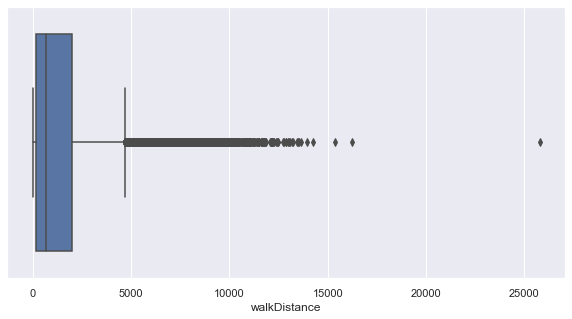

In [98]:
sns.boxplot(x = standard_data.walkDistance)
setSize(10, 5)

(-1.0, 500.0)

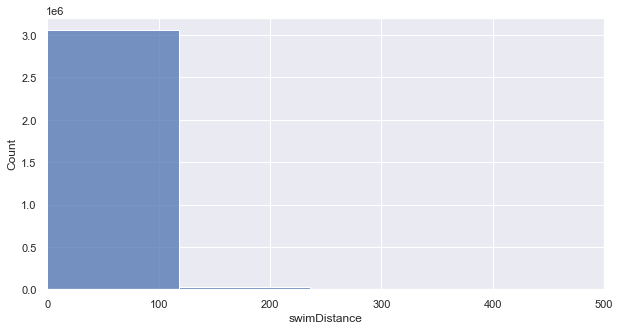

In [99]:
sns.histplot(x = standard_data.swimDistance)
plt.xlim(-1,500)

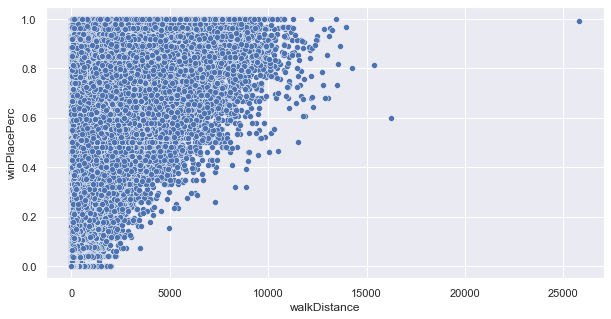

In [100]:
sns.scatterplot(x=standard_data.walkDistance, y=standard_data.winPlacePerc)
setSize(20, 10)

### Swim Distance 

standard_data.swimDistance.describe()

In [101]:
standard_data[(standard_data.swimDistance >= 1978) & (standard_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
7189              2  d50c9d0e65fe2a  4996575c11abcb  668402592429f8        0   
403290           22  aff482b8c08486  383db055216ec2  d6e13468e28ab4        0   
1143792           1  8773d0687c6aae  b17f46f9f6666c  56ee5897512c86        3   
1569852           9  4ffd9c73f52189  cec32f01bb36fd  e23cf41f823ff3        2   
2312382           6  a8653b87e83892  383db055216ec2  d6e13468e28ab4        1   
3072950          20  ba5e3dfb5a0fa0  383db055216ec2  d6e13468e28ab4        0   

         boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
7189          1       503.00      4              3      1          6   
403290        4       109.80      0              0     18         40   
1143792       1       474.40      2              0      0          7   
1569852       5       263.90      1              0      4         12   
2312382       4       843.80      5              5      2          2   
3072950       4        53.32      0              0     16         39   

         killPoints  kills  killStreaks  longestKill  matchDuration  \
7189           1103      3            1       868.70           1897   
403290            0      0            0         0.00           2188   
1143792           0      3            2        30.02           1210   
1569852           0      2            1        44.28           1874   
2312382           0      7            1       696.80           2188   
3072950           0      0            0         0.00           2188   

             matchType  maxPlace  numGroups  rankPoints  revives  \
7189     standard-mode        26         25          -1        0   
403290   standard-mode        26         25        1524        0   
1143792  standard-mode        27         24        1516        0   
1569852  standard-mode        50         47        1496        0   
2312382  standard-mode        26         25        1628        1   
3072950  standard-mode        26         25        1584        0   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
7189           3331.0          0        2718.0          0                0   
403290         3712.0          0        2124.0          0                0   
1143792           0.0          0        2387.0          0                0   
1569852           0.0          0        1980.0          0                0   
2312382        3033.0          0        2206.0          0                0   
3072950        5689.0          0        2148.0          0                0   

         walkDistance  weaponsAcquired  winPoints  winPlacePerc  
7189         4691.000                5       1516        1.0000  
403290       3973.000                5          0        0.9600  
1143792         7.546                6          0        1.0000  
1569852      1341.000                4          0        0.9592  
2312382      4687.000                4          0        0.9600  
3072950      2276.000                5          0        0.9600

In [102]:
((standard_data[(standard_data.swimDistance <= 1978)].shape[0]) * 100)/(standard_data.shape[0])


99.99970852166072

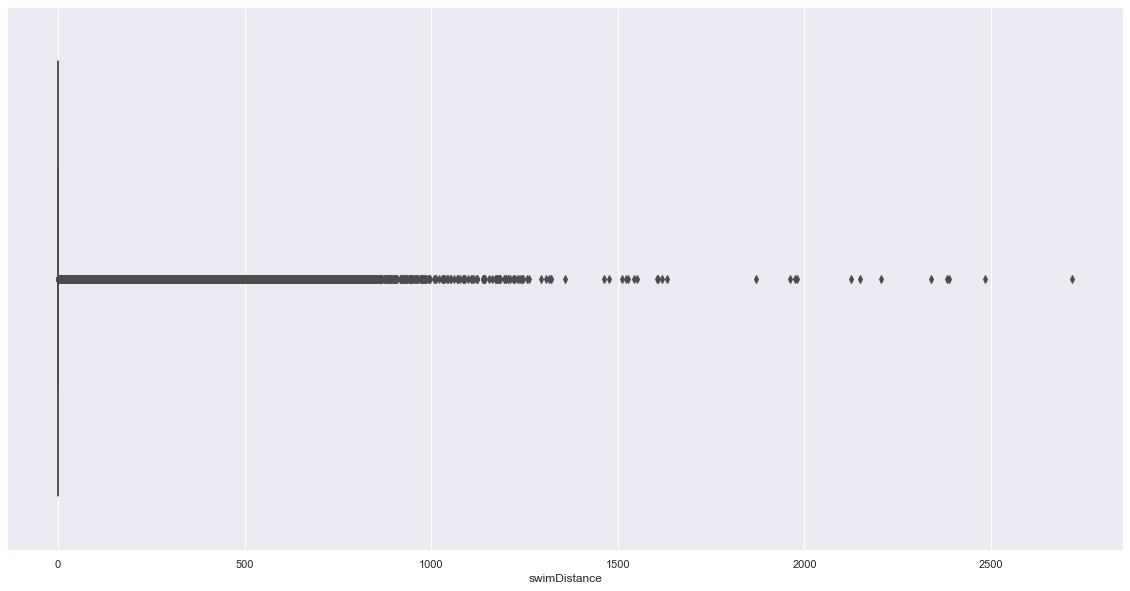

In [103]:
sns.boxplot(x = standard_data.swimDistance)
setSize(10, 5)

(-1.0, 500.0)

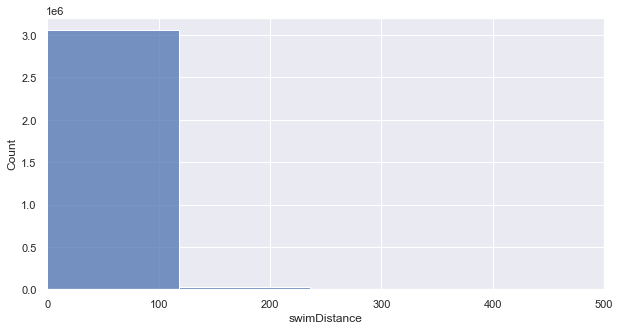

In [104]:
sns.histplot(x = standard_data.swimDistance)
plt.xlim(-1,500)


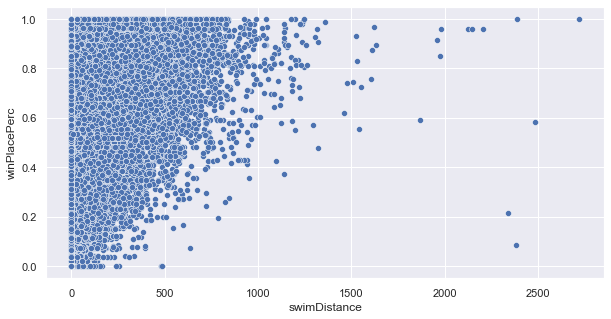

In [105]:
sns.scatterplot(x=standard_data.swimDistance, y=standard_data.winPlacePerc)
setSize(20, 10)

### Ride Distance

In [106]:
standard_data.rideDistance.describe()

count    3.087708e+06
mean     5.969798e+02
std      1.486332e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.080000e-02
max      4.071000e+04
Name: rideDistance, dtype: float64

In [107]:
standard_data[(standard_data.rideDistance >= 1978) & (standard_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
13                6  d6cce0ed023afc  b6b6fa3796e930  7b86700d61ccba        2   
37               18  2e7eee33778f2f  6e2c678644eb28  196518c4206907        0   
45                5  502c64d3580fbd  8941d1cb01d486  cb1dc8835980c4        0   
46               19  493bfe25d3f953  b456cf1c026364  8e1a21111e991f        1   
48                9  4c03c7da2d5bc7  ddce1cf6ae13ae  e9aa5b9bf01f77        0   
...             ...             ...             ...             ...      ...   
3087642           4  ce42e76e15f9e2  b6f1896d3e52a2  561ad0a4f20594        0   
3087646          15  50de125096293e  26f0480753bc3c  20374ca9a84e4a        0   
3087674           4  bec799b652e169  6ed518c5f92e38  eb2f03d5ea377f        0   
3087680           3  ad6b9c920ed887  7bee498d49af84  a6005604c80381        0   
3087696           4  99a6815ca1309e  739e438f152a92  340331f9eaceab        0   

         boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
13            3        234.9      1              1      3         14   
37            4          0.0      0              0     14         48   
45            1        277.3      1              1      4         11   
46            6        187.1      1              0     13         14   
48            4        682.7      5              1      5          3   
...         ...          ...    ...            ...    ...        ...   
3087642       2        103.3      1              1      2         23   
3087646      10        604.5      0              0      5          2   
3087674       1          0.0      0              0      3         44   
3087680       2        179.4      2              2      1          6   
3087696       4          0.0      0              0      0         44   

         killPoints  kills  killStreaks  longestKill  matchDuration  \
13                0      2            2        18.43           1924   
37                0      0            0         0.00           1904   
45             1240      2            2        58.31           1886   
46                0      2            1       115.80           1911   
48             1688      7            4        98.14           1720   
...             ...    ...          ...          ...            ...   
3087642        1042      1            1       156.80           1867   
3087646           0      7            1       161.10           1874   
3087674           0      0            0         0.00           1827   
3087680           0      3            1       146.10           1966   
3087696           0      0            0         0.00           1758   

             matchType  maxPlace  numGroups  rankPoints  revives  \
13       standard-mode        30         29        1489        1   
37       standard-mode        47         43        1527        0   
45       standard-mode        45         41          -1        0   
46       standard-mode        33         32        1394        3   
48       standard-mode        31         30          -1        0   
...                ...       ...        ...         ...      ...   
3087642  standard-mode        44         43          -1        0   
3087646  standard-mode        94         89        1490        0   
3087674  standard-mode        29         28        1340        0   
3087680  standard-mode        30         29        1787        0   
3087696  standard-mode        30         28        1399        1   

         rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
13             2064.0          0          0.00          0                0   
37             3615.0          0          0.00          0                0   
45             2388.0          0          0.00          0                0   
46             7058.0          0          0.00          0                0   
48             3988.0          0          0.00          0                0   
...               ...        ...           ..

In [108]:
((standard_data[(standard_data.rideDistance <= 1978)].shape[0]) * 100)/(standard_data.shape[0])


88.49454028684059

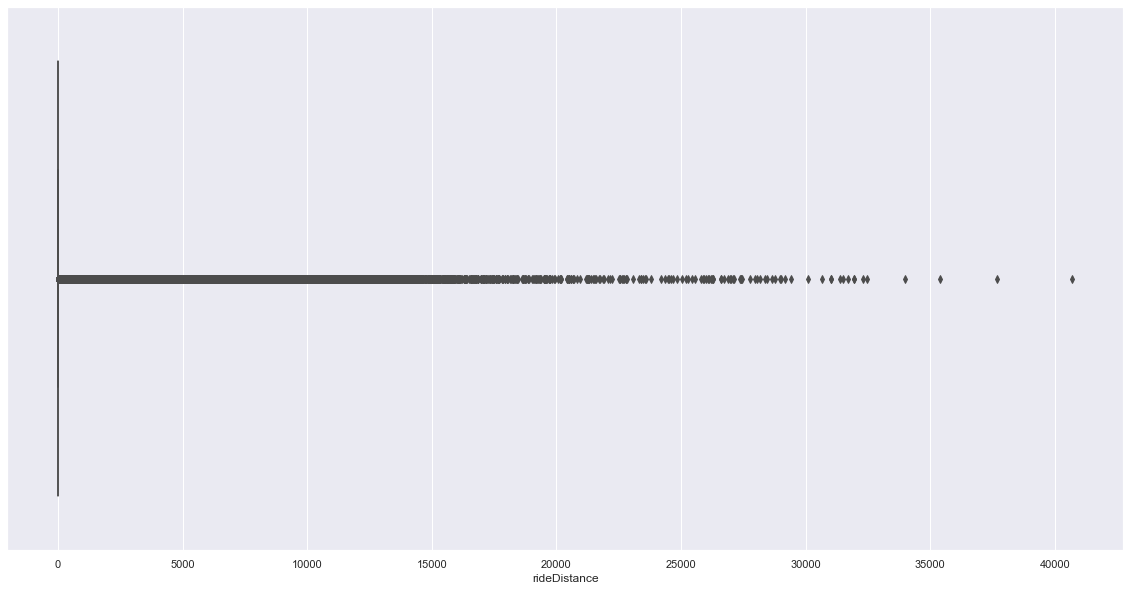

In [109]:
sns.boxplot(x = standard_data.rideDistance)
setSize(10, 5)

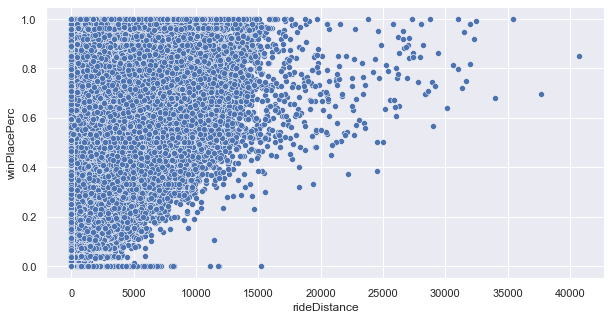

In [110]:
sns.scatterplot(x=standard_data.rideDistance, y=standard_data.winPlacePerc)
setSize(20, 10)

## Arcade Data

### Walk Distance

In [111]:
arcade_data.walkDistance.describe()

count    17757.000000
mean      1356.361759
std       1140.811123
min          0.000000
25%        347.100000
50%       1205.000000
75%       2055.000000
max       8895.000000
Name: walkDistance, dtype: float64

In [112]:
arcade_data[(arcade_data.walkDistance >= 1978) & (arcade_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
1               5  925f3532514b91  34ee06f28f0d4a  9fe954c918c7b2        1   
7              17  3e8947001408d0  901f51f8b9af8f  34810e01e10c95        2   
16             12  d8799e78a1b706  a897fce462c1f7  8f0d0279d8b112        1   
31             10  e1e3db82c02bce  bfc57e168b273e  67c733f06f4f93        0   
32              0  c3cd0e365847be  11cb87034b02ef  fe57e25e37dbfd        0   
...           ...             ...             ...             ...      ...   
17697          10  49fb831cb2740a  34d06e59251a29  9fe954c918c7b2        0   
17701           1  d98f9692512b65  1eb0208e7732b0  3fc14a737b25af        0   
17720          11  241ce53367c857  82fe7b01da4c36  54e0075a25bc32        0   
17721           8  e550cd338c36e6  5fffc9b6a33428  a6bdea801d21ce        0   
17736          11  dc16c35b7b8a0d  216653a212768d  73b2ef399da392        2   

       boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
1           3       409.40      2              0      2         16   
7           8       725.80      4              0      9          2   
16          5       213.00      2              0      7         20   
31          2       310.80      2              0      8          2   
32          0       253.00      1              0      0         18   
...       ...          ...    ...            ...    ...        ...   
17697       5        36.45      0              0      5         33   
17701       0       177.60      3              1      1          1   
17720       5       627.20      2              0      6         17   
17721       7       100.00      0              0      1          2   
17736       4       373.30      2              1      7          3   

       killPoints  kills  killStreaks  longestKill  matchDuration  \
1            1000      1            1        40.59           1927   
7            1000      8            2       217.60           2177   
16              0      1            1        45.62           1991   
31           1000      3            1       151.40           1957   
32              0      2            1        28.71           1864   
...           ...    ...          ...          ...            ...   
17697        1000      0            0         0.00           1927   
17701           0      3            1        98.82           1331   
17720           0      1            1       302.30           1994   
17721           0      1            1        16.01           1215   
17736           0      4            2       122.60           2013   

         matchType  maxPlace  numGroups  rankPoints  revives  rideDistance  \
1      arcade-mode        32         32          -1        1           0.0   
7      arcade-mode        36         36          -1        0        4192.0   
16     arcade-mode        16         16        1500        1        1726.0   
31     arcade-mode        15         15          -1        1        5260.0   
32     arcade-mode        25         25        1500        0           0.0   
...            ...       ...        ...         ...      ...           ...   
17697  arcade-mode        32         32          -1        0        1095.0   
17701  arcade-mode         6          6        1500        0           0.0   
17720  arcade-mode        16         16        1500        0        6454.0   
17721  arcade-mode         9          9        1500        0           0.0   
17736  arcade-mode        21         21        1500        0        2898.0   

       roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
1              0           0.0          0                0        2333.0   
7              0           0.0          0                0        2772.0   
16             0           0.0          0                0        3423.0   
31             0         201.5          0                0        3528.0   
32             0           0.0          0                0        2500.0   
...    

In [113]:
((arcade_data[(arcade_data.walkDistance <= 1978)].shape[0]) * 100)/(arcade_data.shape[0])


73.22745959339979

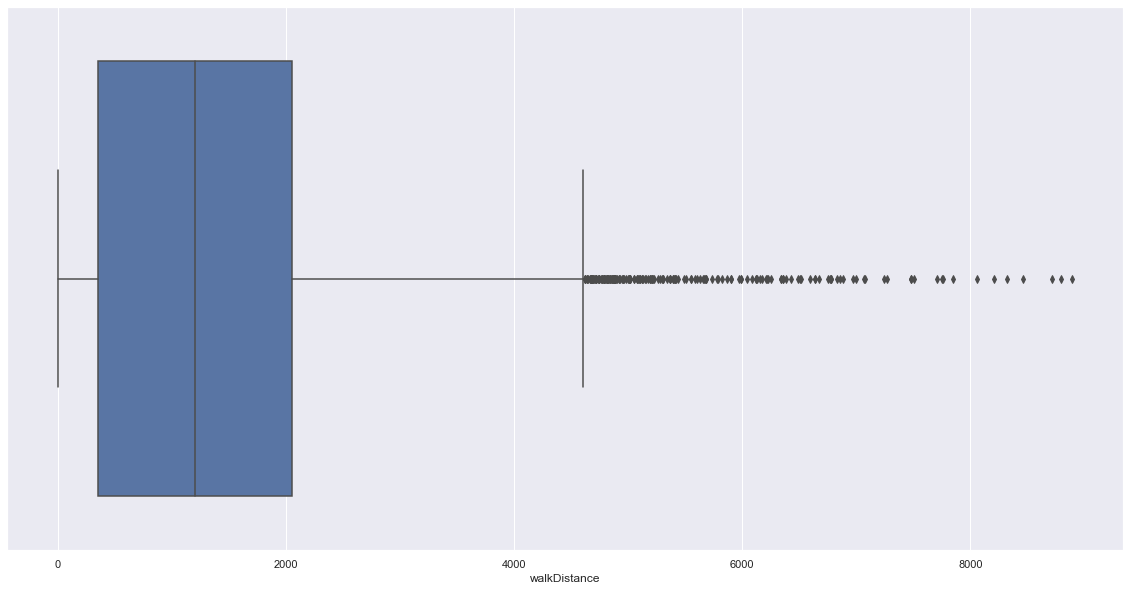

In [114]:
sns.boxplot(x = arcade_data.walkDistance)
setSize(10, 5)

(-1.0, 500.0)

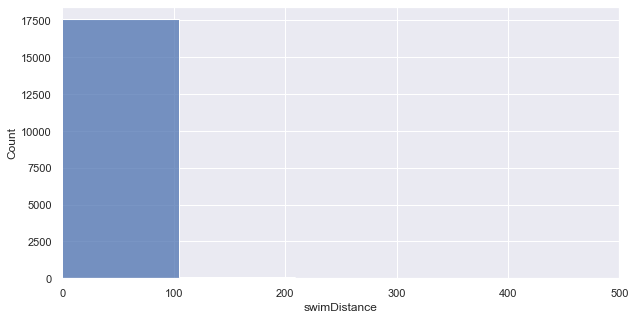

In [115]:
sns.histplot(x = arcade_data.swimDistance)
plt.xlim(-1,500)

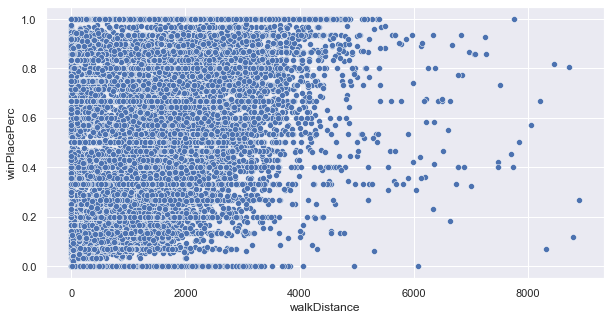

In [116]:
sns.scatterplot(x=arcade_data.walkDistance, y=arcade_data.winPlacePerc)
setSize(20, 10)

### Swim Distance 

In [117]:
arcade_data.swimDistance.describe()

count    17757.000000
mean         4.687403
std         39.259302
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1669.000000
Name: swimDistance, dtype: float64

In [118]:
arcade_data[(arcade_data.swimDistance >= 1978) & (arcade_data.winPlacePerc > 0.7)]


Empty DataFrame
Columns: [heal_boost, Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc]
Index: []

In [119]:
((arcade_data[(arcade_data.swimDistance <= 1978)].shape[0]) * 100)/(arcade_data.shape[0])


100.0

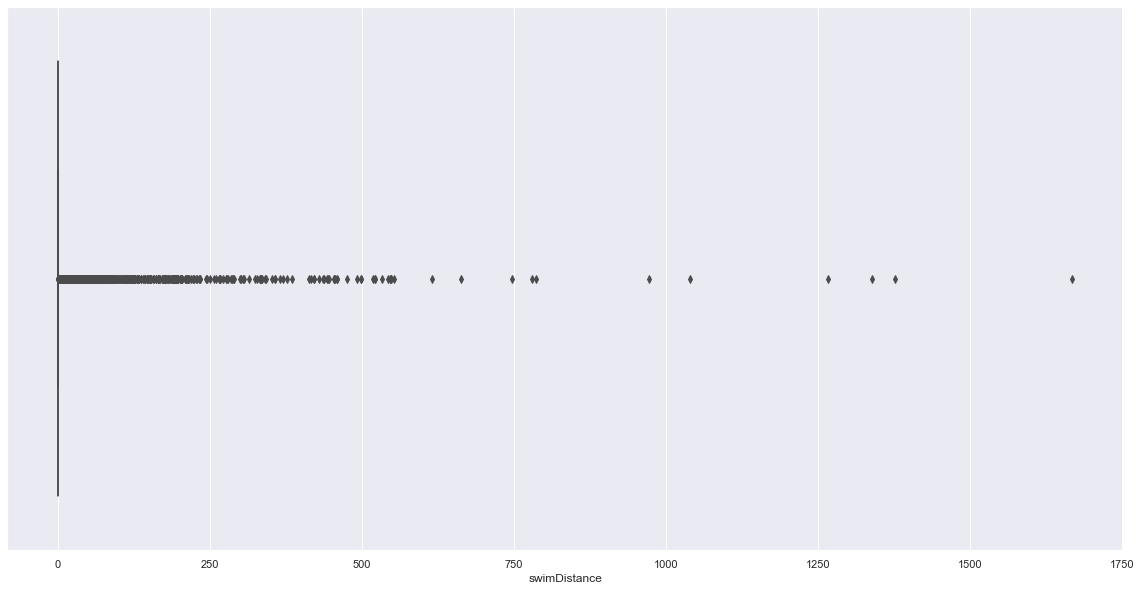

In [120]:
sns.boxplot(x = arcade_data.swimDistance)
setSize(10, 5)

(-1.0, 500.0)

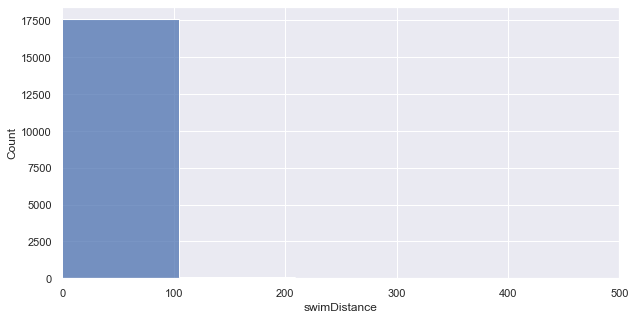

In [121]:
sns.histplot(x = arcade_data.swimDistance)
plt.xlim(-1,500)

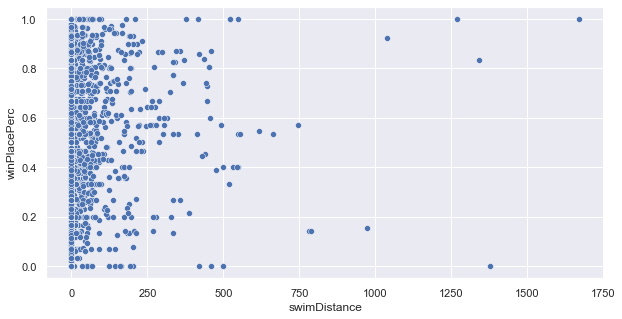

In [122]:
sns.scatterplot(x=arcade_data.swimDistance, y=arcade_data.winPlacePerc)
setSize(20, 10)

### Ride Distance


In [123]:
arcade_data.rideDistance.describe()

count    17757.000000
mean      1911.754401
std       2521.583572
min          0.000000
25%          0.000000
50%        381.100000
75%       3411.000000
max      14270.000000
Name: rideDistance, dtype: float64

In [124]:
arcade_data[(arcade_data.rideDistance >= 1978) & (arcade_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
7              17  3e8947001408d0  901f51f8b9af8f  34810e01e10c95        2   
31             10  e1e3db82c02bce  bfc57e168b273e  67c733f06f4f93        0   
35              1  a13d91824f576e  5691b322098825  cd274c4ca7d4f9        0   
38              7  d6a14d94d2538d  50ec7bd62a6207  601ce247d97e80        0   
50             13  8056d30b1ace71  d0ddb2849e2b6f  c39a4eec9d5af6        2   
...           ...             ...             ...             ...      ...   
17736          11  dc16c35b7b8a0d  216653a212768d  73b2ef399da392        2   
17742           3  dafee0560def4d  ab1b94af0326c5  4881dc60a3e594       11   
17746           0  15958d14b861a0  ff1d4aae619315  d38a14fb160874        3   
17752           9  bda01f6b50fa62  444e4759a1bb72  c6c4dcf88186f5        1   
17756          11  1be563156ecd86  33b3a60431e038  6a2fcb6af98567        1   

       boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  \
7           8       725.80      4              0      9          2   
31          2       310.80      2              0      8          2   
35          1       229.70      1              0      0         33   
38          2        27.13      0              0      5         30   
50          6       183.00      0              0      7         44   
...       ...          ...    ...            ...    ...        ...   
17736       4       373.30      2              1      7          3   
17742       0      1666.00     17              4      3         20   
17746       0       976.80      0              0      0          9   
17752       2       418.20      3              1      7         12   
17756       7       239.70      1              1      4         17   

       killPoints  kills  killStreaks  longestKill  matchDuration  \
7            1000      8            2       217.60           2177   
31           1000      3            1       151.40           1957   
35              0      0            0         0.00           2022   
38           1000      0            0         0.00           2174   
50              0      0            0         0.00           2185   
...           ...    ...          ...          ...            ...   
17736           0      4            2       122.60           2013   
17742        1000     11            2        39.44           1195   
17746        1000      9            2        77.31            532   
17752           0      1            1       165.00           1994   
17756        1000      1            1       481.30           1940   

         matchType  maxPlace  numGroups  rankPoints  revives  rideDistance  \
7      arcade-mode        36         36          -1        0        4192.0   
31     arcade-mode        15         15          -1        1        5260.0   
35     arcade-mode        16         16        1500        1        6100.0   
38     arcade-mode        16         16          -1        0        5668.0   
50     arcade-mode        20         20        1500        1        3715.0   
...            ...       ...        ...         ...      ...           ...   
17736  arcade-mode        21         21        1500        0        2898.0   
17742  arcade-mode        12         12          -1        0        3648.0   
17746  arcade-mode         8          8          -1        0        3928.0   
17752  arcade-mode        14         14        1500        1        3896.0   
17756  arcade-mode        16         16          -1        0        4884.0   

       roadKills  swimDistance  teamKills  vehicleDestroys  walkDistance  \
7              0           0.0          0                0        2772.0   
31             0         201.5          0                0        3528.0   
35             0           0.0          0                0        1927.0   
38             0           0.0          0                0        1069.0   
50             0           0.0          0                0        2400.0   
...    

In [125]:
((arcade_data[(arcade_data.rideDistance <= 1978)].shape[0]) * 100)/(arcade_data.shape[0])


62.76961198400631

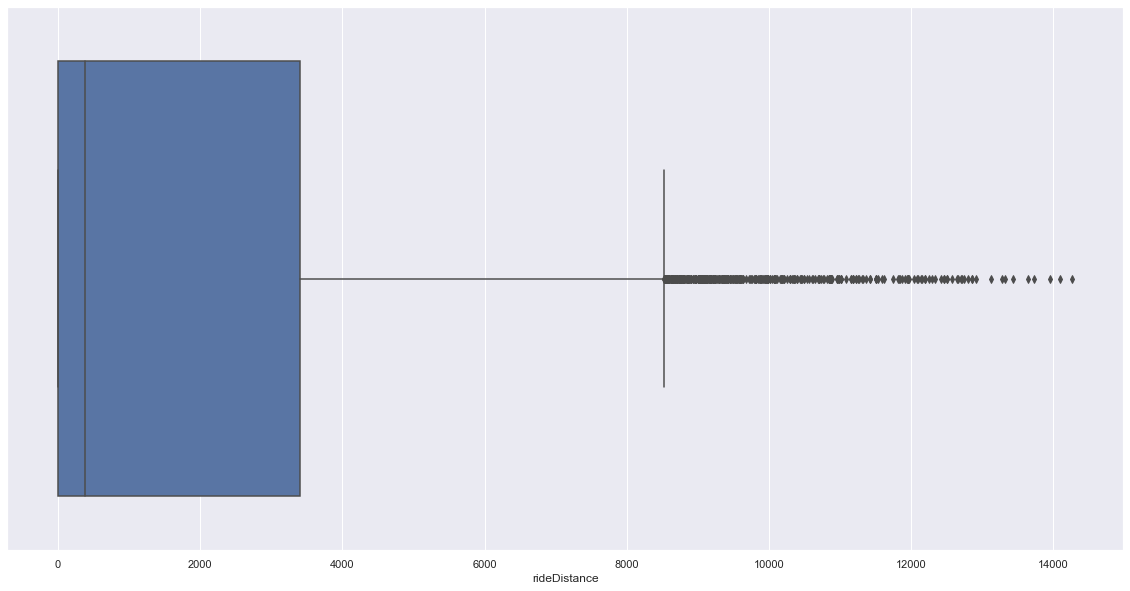

In [126]:
sns.boxplot(x = arcade_data.rideDistance)
setSize(10, 5)

(-1.0, 500.0)

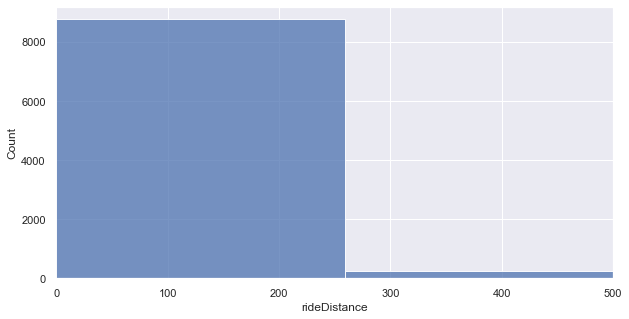

In [127]:
sns.histplot(x = arcade_data.rideDistance)
plt.xlim(-1,500)

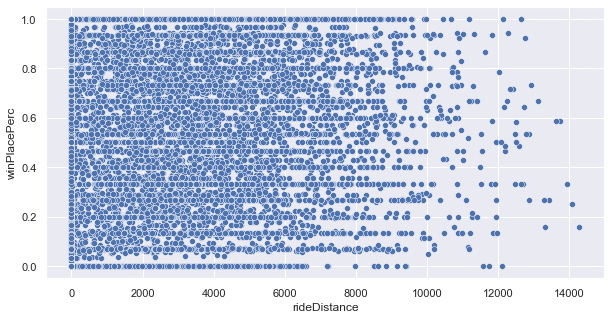

In [128]:
sns.scatterplot(x=arcade_data.rideDistance, y=arcade_data.winPlacePerc)
setSize(20, 10)

## Other Data

### Walk Distance

In [129]:
other_data.walkDistance.describe()

count    6873.000000
mean      927.365370
std       964.207372
min         0.000000
25%       249.000000
50%       572.200000
75%      1338.000000
max      7943.000000
Name: walkDistance, dtype: float64

In [130]:
other_data[(other_data.walkDistance >= 1978) & (other_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
0             10  5593c0f40075d1  4bda9b1fc20122  f2fe485c064dd1        0   
41            14  47fbf493c4f7e4  0001cad8adc6ea  5c253885cbdcd2        0   
57            19  13b774693011bb  d02a37a41c471b  b3ccecf973de79        1   
60             1  fbf1ed6ca6b1f5  321ea0922a5f65  f8dbb6134bf6fc        0   
63            13  9602463513ab4f  f04e932b8c9257  fefe600c28274a        0   
...          ...             ...             ...             ...      ...   
6809           4  ae3d7140be2fb1  4c33ad393efe67  5c253885cbdcd2        0   
6812           5  b2d9b2c7263fd6  d1c570c4c10dcd  da9005aa580709        0   
6824           7  95cc2a848d15b4  6f5fab6c4a09a1  409ace5db1b6a1        6   
6825           4  ba475a8187bb60  8f7cf43d8ddc54  8fcb66d54bb1a2        1   
6847           9  fb14f3aeb66c4d  b258ba8148bd91  d335f152ab7fa2        0   

      boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
0          3       165.80      0              0      7         35           0   
41         3       434.60      2              1     11         21           0   
57         5       355.50      1              2     14          8           0   
60         1        66.60      0              0      0         20           0   
63         3         0.00      0              0     10         43           0   
...      ...          ...    ...            ...    ...        ...         ...   
6809       1        41.62      0              0      3         25           0   
6812       4       385.60      0              1      1         13        1000   
6824       6       552.30      2              1      1          5           0   
6825       2       361.90      3              0      2          6           0   
6847       3       734.30      5              1      6          1        1000   

      kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
0         0            0       0.0000           1981     other        26   
41        1            1     116.3000           1867     other        24   
57        3            1     153.7000           1914     other        26   
60        1            1       0.8038            916     other        49   
63        0            0       0.0000            829     other        49   
...     ...          ...          ...            ...       ...       ...   
6809      1            1       6.3780           1867     other        24   
6812      1            1      28.9300           1857     other        16   
6824      3            1     387.6000           1811     other        24   
6825      4            2      78.3100           1932     other        26   
6847      6            3     299.9000           1870     other        15   

      numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
0            23        1500        0           0.0          0          0.00   
41           23        1500        2         704.9          0          0.00   
57           24        1500        3        3947.0          0          0.00   
60           48        1500        0         499.7          0          0.00   
63           46        1500        0           0.0          0          0.00   
...         ...         ...      ...           ...        ...           ...   
6809         23        1500        0        1443.0          1          0.00   
6812         15          -1        0        3034.0          0          0.00   
6824         23        1500        1        3513.0          0          0.00   
6825         26        1500        1        2906.0          0         24.55   
6847         15          -1        3        5147.0          0          0.00   

      teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
0             0                0        3577.0                6          0   
41            0                0        4076.0                7          0   
57          

In [131]:
((other_data[(other_data.walkDistance <= 1978)].shape[0]) * 100)/(other_data.shape[0])


85.98865124399825

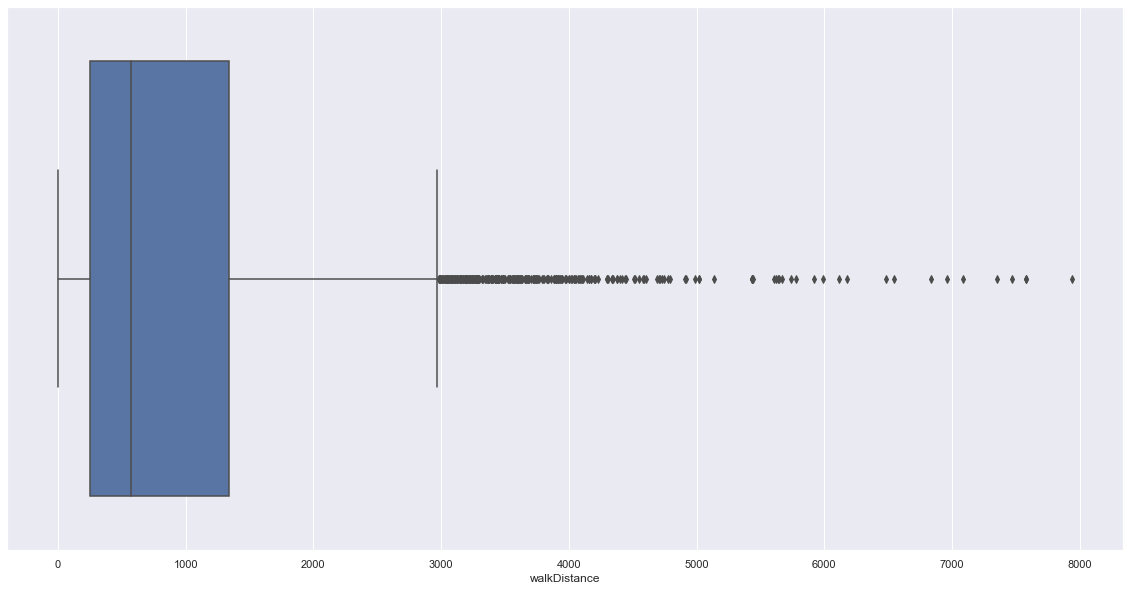

In [132]:
sns.boxplot(x = other_data.walkDistance)
setSize(10, 5)

(-1.0, 500.0)

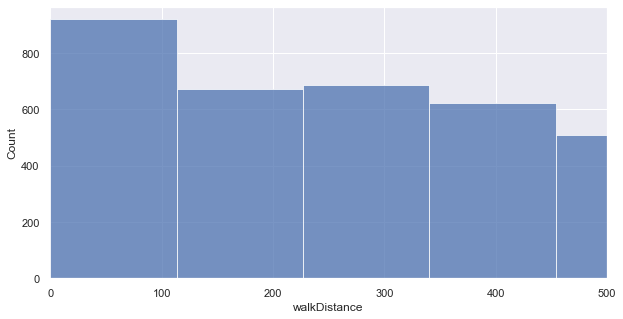

In [133]:
sns.histplot(x = other_data.walkDistance)
plt.xlim(-1,500)

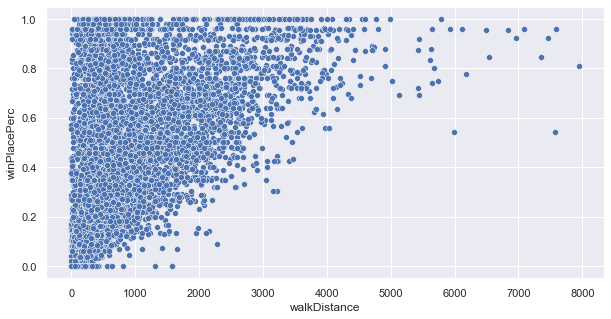

In [134]:
sns.scatterplot(x=other_data.walkDistance, y=other_data.winPlacePerc)
setSize(20, 10)

### Swim Distance 

In [135]:
other_data.swimDistance.describe()

count    6873.000000
mean        2.912849
std        25.700710
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       559.800000
Name: swimDistance, dtype: float64

In [136]:
other_data[(other_data.swimDistance >= 1978) & (other_data.winPlacePerc > 0.7)]


Empty DataFrame
Columns: [heal_boost, Id, groupId, matchId, assists, boosts, damageDealt, DBNOs, headshotKills, heals, killPlace, killPoints, kills, killStreaks, longestKill, matchDuration, matchType, maxPlace, numGroups, rankPoints, revives, rideDistance, roadKills, swimDistance, teamKills, vehicleDestroys, walkDistance, weaponsAcquired, winPoints, winPlacePerc]
Index: []

In [137]:
((other_data[(other_data.swimDistance <= 1978)].shape[0]) * 100)/(other_data.shape[0])


100.0

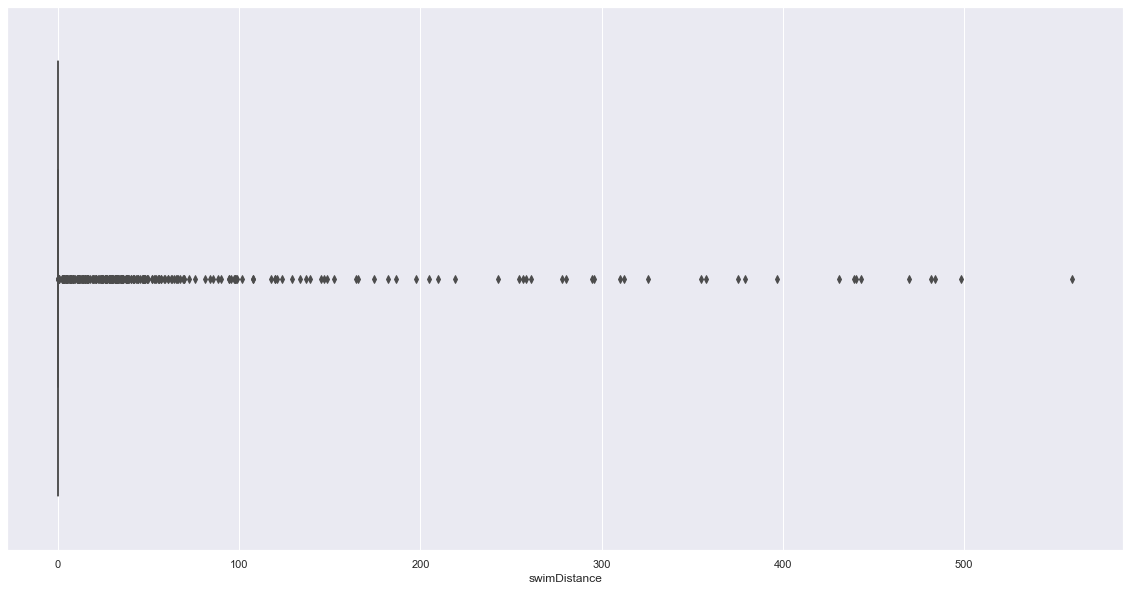

In [138]:
sns.boxplot(x = other_data.swimDistance)
setSize(10, 5)

(-1.0, 500.0)

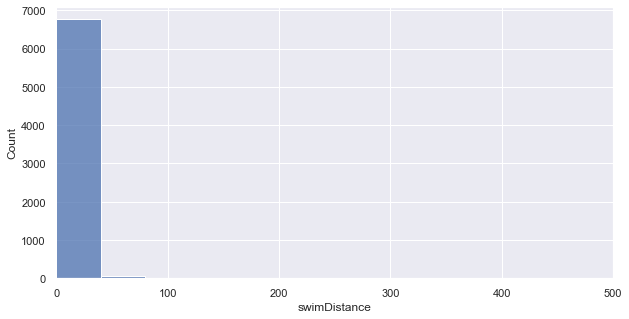

In [139]:
sns.histplot(x = other_data.swimDistance)
plt.xlim(-1,500)

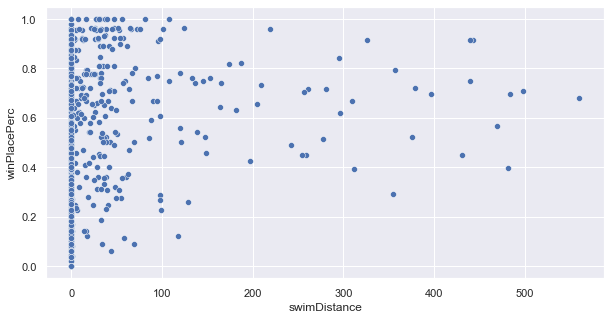

In [140]:
sns.scatterplot(x=other_data.swimDistance, y=other_data.winPlacePerc)
setSize(20, 10)

### Ride Distance

In [141]:
other_data.rideDistance.describe()

count     6873.000000
mean      1754.884327
std       2232.770661
min          0.000000
25%          0.000000
50%        384.900000
75%       3380.000000
max      12550.000000
Name: rideDistance, dtype: float64

In [142]:
other_data[(other_data.rideDistance >= 1978) & (other_data.winPlacePerc > 0.7)]


heal_boost              Id         groupId         matchId  assists  \
2              0  2c99b3c78b89c0  e358e4fe29e3ac  05f0780ee6b9b1        0   
12             4  c51c34ac3ee272  044ce524740197  3510f8e6c1972d        0   
13             7  184f30b0183ec7  254876c6a0ede9  be945f2803814a        0   
18             5  86730e61cee2e1  60fe9d7d21affc  06daf4bfe4549a        0   
20             4  6db5a0d9febdd9  c181f372a0a4c3  8b84d175271790        0   
...          ...             ...             ...             ...      ...   
6861           0  714c5aeb23670d  e8fb3618e135d0  ee9fb50eb0fe00        0   
6863           4  1def58b4e00656  8724dd5421028a  678649e2a34e50        2   
6869           8  bc867cc7cd3fb2  2c13302579a249  409ace5db1b6a1        2   
6870           6  a495aba6ac324c  e433cafef7618c  9330d8b6105b05        0   
6872          10  86cbd3b0987561  a97bda3d5316b4  61d6bc6e455f75        2   

      boosts  damageDealt  DBNOs  headshotKills  heals  killPlace  killPoints  \
2          0       252.60      1              0      0          7           0   
12         2        72.02      1              0      2         20           0   
13         6       295.60      1              0      1          9           0   
18         3        67.88      0              0      2         35           0   
20         2       100.00      1              0      2         20           0   
...      ...          ...    ...            ...    ...        ...         ...   
6861       0       432.30      1              0      0          5           0   
6863       3       972.00      6              0      1          3           0   
6869       2       267.10      1              0      6         18           0   
6870       1         0.00      0              0      5         41           0   
6872       3       159.60      0              0      7         44        1000   

      kills  killStreaks  longestKill  matchDuration matchType  maxPlace  \
2         2            1        3.701            886     other        50   
12        1            1        3.197            914     other        43   
13        3            2       51.960            915     other        50   
18        0            0        0.000            921     other        51   
20        1            1        4.979            909     other        51   
...     ...          ...          ...            ...       ...       ...   
6861      3            1        4.574            869     other        30   
6863      5            2       22.200            909     other        51   
6869      1            1        5.229           1811     other        24   
6870      0            0        0.000            911     other        48   
6872      0            0        0.000           1801     other        25   

      numGroups  rankPoints  revives  rideDistance  roadKills  swimDistance  \
2            44        1500        0        4858.0          1           0.0   
12           41        1500        0        4129.0          1           0.0   
13           50        1500        0        4522.0          0           0.0   
18           47        1500        0        3288.0          0           0.0   
20           44        1500        0        6378.0          1           0.0   
...         ...         ...      ...           ...        ...           ...   
6861         29        1500        0        5111.0          3           0.0   
6863         45        1500        0        3260.0          1           0.0   
6869         23        1500        2        6602.0          0           0.0   
6870         46        1500        0        4705.0          0           0.0   
6872         24          -1        0        6322.0          0           0.0   

      teamKills  vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
2             0                1         526.8                3          0   
12            0                0         655.8                1          0   
13          

In [143]:
((other_data[(other_data.rideDistance <= 1978)].shape[0]) * 100)/(other_data.shape[0])


63.494834861050485

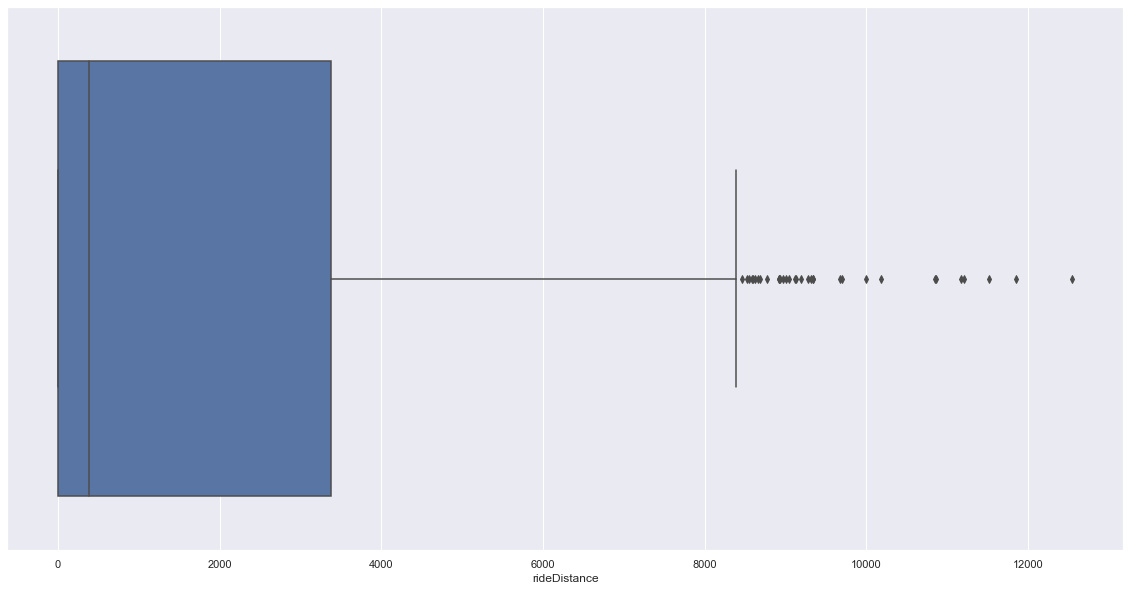

In [144]:
sns.boxplot(x = other_data.rideDistance)
setSize(10, 5)

(-1.0, 500.0)

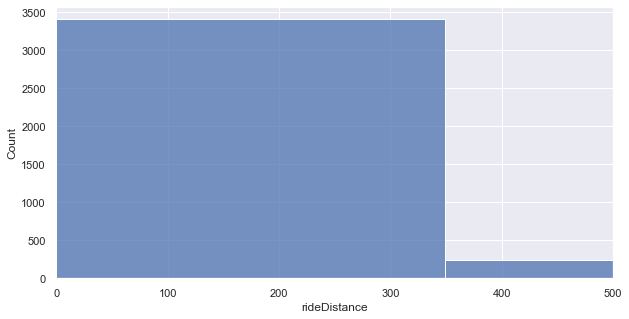

In [145]:
sns.histplot(x = other_data.rideDistance)
plt.xlim(-1,500)

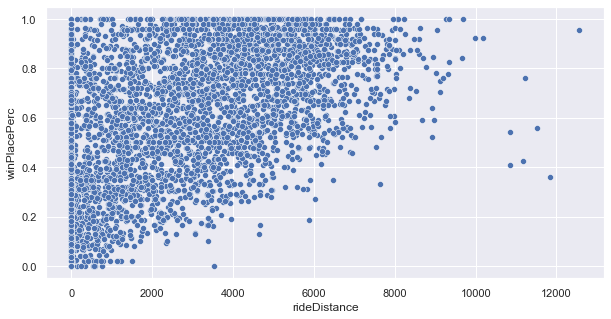

In [146]:
sns.scatterplot(x=other_data.rideDistance, y=other_data.winPlacePerc)
setSize(20, 10)